## **IMI BIG DATA & AI CASE COMPETITION**

## *By: Hafsa, Cindy, Tahir & Albert*

# Table of Contents:
1. [Initial Set-Up & Import Data](#1)
2. [Exploratory Data Analysis](#2) 
    1. [Dataset, Datatypes, Missing Data, Duplicates, Graphs](#2.1)
    2. [Data Cleaning Methods](#2.2)
        1. [Data Prep -- Column Types, Date Manipulations, Removing outliers](#2.2.1)
        2. [Missing Values - Simple Imputer (Mean, Median, Random Imputation, Average Growth)](#2.2.2)
        3. [Missing Values - Three Year Average](#2.2.3)
        4. [Missing Values - Complex Imputer (Deterministic, Stochastic Regression, KNN)](#2.2.4)
    2. [Further Analysis (Barplots, Scatterplots, CustomerID, Classes, K-Means Clustering)](#2.2)
    3. [Data Distributions by Features & Investment Type](#2.3)

# Initial Set-Up & Import Data <a class="anchor" id="1"></a>

In [29]:
# Import relevent Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import math

# Model Metrics & Data Pre-processing 
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

# Imbalance dataset methods
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Miscellaneous
from collections import Counter

# Additional Libraries -- Automatic Explanatory Data Analysis
from pandas_profiling import ProfileReport
from IPython.core.display import display, HTML

# Remove warnings (so it doesn't take up space)
import warnings
warnings.filterwarnings('ignore')

# Set seed for repition 
np.random.seed(2022)

In [30]:
# Some settings for making the tables, plots and the report look nicer
sns.set_theme()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 999)
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.container { length:100% !important; }</style>")) 

In [31]:

# Read in the data
# Canadian Companies Data
df1 = pd.read_excel("/Users/tahir/Desktop/Fraudit/Datasets/cmeg_df_case_competition_scrambled_train.xlsx")

# General Companies Data
df2 = pd.read_excel("/Users/tahir/Desktop/Fraudit/Datasets/general_industries_df_case_competition_scrambled_train.xlsx")

# Data Dictionary from Canadian Companies Dataset (Although both data dictionaries are the same) 
data_dictionary = pd.read_excel("/Users/tahir/Desktop/Fraudit/Datasets/cmeg_df_case_competition_scrambled_train.xlsx", sheet_name=1)


In [32]:
# GOOGLE COLLAB MEMBERS -- PLEASE UNCOMMENT AND RUN THIS BELOW 
"""
# load Google Drive onto colab
from google.colab import drive 
drive.mount('/content/gdrive') # Make sure you have a copy of the shared google drive folder in your personal drive

# load the cmeg training data set:
df1 = pd.read_excel("gdrive/My Drive/IMI Competition 2022/Datasets/cmeg_df_case_competition_scrambled_train.xlsx")

# load the general_industries training data set:
df2 = pd.read_excel("gdrive/My Drive/IMI Competition 2022/Datasets/general_industries_df_case_competition_scrambled_train.xlsx")

# read the second sheet with the data key
data_dictionary = pd.read_excel("gdrive/My Drive/IMI Competition 2022/Datasets/general_industries_df_case_competition_scrambled_train.xlsx", sheet_name=1)
"""
print(" ")

# Exploratory Data Analysis <a class="anchor" id="2"></a>

## Dataset, Datatypes, Missing Data & Duplicates <a class="anchor" id="2.1"></a>

In [33]:
df1.head()

ROW  Corp_Residence_Country_Code  BR Code  Period  CUSTOMER_ID  Final_IG  \
0   5662                            1        5  2017Q4         1576         5   
1  16369                            1        5  2015Q4         4545         7   
2   2326                            0       12  2015Q2          648         8   
3  38131                            0       19  2017Q3        13395         5   
4  36605                            0       19  2015Q3        12998         6   

   B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
0            1  575863.911214  602838.635998  583646.469630  614602.866245   
1            1  599469.364624  615373.028208  612705.047096            NaN   
2            1  613829.072017  575020.270272            NaN            NaN   
3            1  585059.299344  581915.869330  594033.887481  609965.034011   
4            1  605966.227164  593540.797737            NaN            NaN   

   TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3   TOTALDEBT_Y0  \
0  619611.510181  621095.725446  611355.907673  582433.004400  623105.791017   
1  608126.531748  601435.154115  587550.520995            NaN  627335.355343   
2  608391.483917  611859.108037            NaN            NaN  585464.960100   
3  591791.219692  598332.776102  589877.849288  622230.836194  584513.060799   
4  582546.955793  614212.207680            NaN            NaN  590177.329836   

    TOTALDEBT_Y1   TOTALDEBT_Y2   TOTALDEBT_Y3  TOTALREVENUE_Y0  \
0  596800.177680  600460.033208  598408.339905    611355.411490   
1  611300.879046  572542.268654            NaN    604626.757034   
2  571781.269380            NaN            NaN    608591.366569   
3  626767.691011  625743.779183  573802.856646    615999.168162   
4  570997.852457            NaN            NaN    607879.645878   

   TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  CURRENTASSET_Y0  \
0    589592.109008    605336.777910    574789.603998    620745.952718   
1    586282.226249    624691.726730              NaN    596315.871786   
2    578175.200440              NaN              NaN    618999.144319   
3    588623.823558    600443.812695    633589.116171    582358.584899   
4    628042.392612              NaN              NaN    624481.204725   

   CURRENTASSET_Y1  CURRENTASSET_Y2  CURRENTASSET_Y3  FIXEDASSET_Y0  \
0    621004.600446    614991.732391    604478.517167  609095.636450   
1    609786.889797    620321.870767              NaN  577715.935070   
2    614118.293569              NaN              NaN  578343.317529   
3    612497.219818    606794.985460    589340.181176  621919.270235   
4    620443.236288              NaN              NaN  581316.994347   

   FIXEDASSET_Y1  FIXEDASSET_Y2  FIXEDASSET_Y3  CURRENTLIABILITY_Y0  \
0  600147.701765  589971.619360  580405.105567        578103.988392   
1  576662.704616  582062.515093            NaN        616376.771099   
2  575530.917780            NaN            NaN        603655.551037   
3  607400.754064  581688.692973  633939.157288        620046.519867   
4  618157.473873            NaN            NaN        594651.641147   

   CURRENTLIABILITY_Y1  CURRENTLIABILITY_Y2  CURRENTLIABILITY_Y3  \
0        577109.531117        574090.626783        583030.371565   
1        604827.131130        599463.087501                  NaN   
2        574183.093293                  NaN                  NaN   
3        607197.874782        589234.421690        615945.241601   
4        588273.242403                  NaN                  NaN   

   NONCURRLIA_Y0  NONCURRLIA_Y1  NONCURRLIA_Y2  NONCURRLIA_Y3  TOTALEQUITY_Y0  \
0  600890.935743  604975.472270  600103.052065  601804.995337   596259.219747   
1  584268.408156  615338.209036  617623.837767            NaN   599915.942888   
2  605298.293603  598985.457637            NaN            NaN   577735.145730   
3  624582.882164  571604.744174  618284.670890  582971.670808   601679.290137   
4  619814.409081  612323.296890            NaN            

In [34]:
df2.head()

ROW  Corp_Residence_Country_Code  BR Code  Period  CUSTOMER_ID  Final_IG  \
0  28464                            2        4  2017Q1         8228         8   
1  39693                            3       63  2018Q4        12315         7   
2  19535                           15       13  2018Q2         5504         6   
3   4286                            2        4  2020Q1         1107         8   
4  39621                           59       30  2019Q2        12294         8   

   B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
0            1  365604.767017  341575.264490  368053.254720  370696.187829   
1            1  748378.874160  593272.587785  606298.959960  509377.247299   
2            1  379351.685119  394182.092405  380051.883962  383669.693000   
3            1  363552.396086  371786.373645  371542.067484  365204.228853   
4            1  368530.936855  367450.033454  358297.870364            NaN   

   TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3  TOTALDEBT_Y0  \
0   3.706175e+05   3.497885e+05   3.485696e+05   3.757753e+05  3.755110e+05   
1   3.569760e+06   2.232579e+06   2.209726e+06   1.892110e+06  2.179446e+06   
2   6.441022e+05   6.050513e+05   6.206603e+05   6.305246e+05  4.253858e+05   
3   3.846639e+05   3.789517e+05   3.551879e+05   3.713978e+05  3.721745e+05   
4   3.516819e+05   3.563508e+05   3.427291e+05            NaN  3.693332e+05   

   TOTALDEBT_Y1  TOTALDEBT_Y2  TOTALDEBT_Y3  TOTALREVENUE_Y0  TOTALREVENUE_Y1  \
0  3.726001e+05  3.606447e+05  3.735396e+05     3.560748e+05     3.633396e+05   
1  1.022687e+06  1.061187e+06  1.032433e+06     1.522408e+06     1.327851e+06   
2  3.907357e+05  4.774559e+05  4.528249e+05     7.995319e+05     7.199362e+05   
3  3.713703e+05  3.779592e+05  3.445819e+05     3.636668e+05     3.575831e+05   
4  3.623486e+05  3.399790e+05           NaN     3.529416e+05     3.407400e+05   

   TOTALREVENUE_Y2  TOTALREVENUE_Y3  CURRENTASSET_Y0  CURRENTASSET_Y1  \
0     3.585169e+05     3.715991e+05     3.434351e+05    344977.126649   
1     1.280758e+06     1.135047e+06     1.147513e+06    829702.295435   
2     7.406381e+05     7.131936e+05     5.311816e+05    514741.746178   
3     3.662552e+05     3.804336e+05     3.623015e+05    377101.596125   
4     3.740230e+05              NaN     3.715968e+05    371805.672012   

   CURRENTASSET_Y2  CURRENTASSET_Y3  FIXEDASSET_Y0  FIXEDASSET_Y1  \
0    367162.335140    349945.750055   3.784293e+05   3.720962e+05   
1    760807.341039    848280.904223   2.716973e+06   1.640463e+06   
2    528849.435520    584501.847521   4.444025e+05   4.533300e+05   
3    374928.690083    345777.748609   3.555814e+05   3.733798e+05   
4    346038.553821              NaN   3.720567e+05   3.721733e+05   

   FIXEDASSET_Y2  FIXEDASSET_Y3  CURRENTLIABILITY_Y0  CURRENTLIABILITY_Y1  \
0   3.688327e+05   3.472348e+05        355541.904130        367439.639625   
1   1.751083e+06   1.379226e+06        644352.547945        487669.347380   
2   4.490554e+05   4.587347e+05        481135.648099        467669.404784   
3   3.593706e+05   3.437278e+05        348458.696351        361418.841014   
4   3.614443e+05            NaN        360704.301769        349895.912646   

   CURRENTLIABILITY_Y2  CURRENTLIABILITY_Y3  NONCURRLIA_Y0  NONCURRLIA_Y1  \
0        340433.991591        367150.907129   3.534059e+05   3.557170e+05   
1        497662.519665        481394.063071   2.395843e+06   1.201515e+06   
2        504347.660158        534499.419393   4.083899e+05   4.119477e+05   
3        356877.324987        363708.386391   3.470063e+05   3.555032e+05   
4        356684.002329                  NaN   3.717421e+05   3.443014e+05   

   NONCURRLIA_Y2  NONCURRLIA_Y3  TOTALEQUITY_Y0  TOTALEQUITY_Y1  \
0   3.530858e+05   3.409601e+05    3.533652e+05    3.479149e+05   
1   1.199559e+06   1.092157e+06    1.555716e+06    1.472948e+06   
2   4.186677e+05   4.258029e+05    4.526367e+05    4.622175e+05   
3   3.628690e+05   3.462930e+05    3.70

In [35]:
data_dictionary[:10]

Column  \
0  Corp_Residence_Country_Code   
1                      BR Code   
2                       Period   
3               Period_Numeric   
4      CUSTOMER_ID (Tokenized)   
5             RATING_SAVE_DATE   
6               STATEMENT_DATE   
7                     Final_IG   
8                  B_PLUS_FLAG   
9                    EBITDA_Y0   

                                         Description  
0                                       Country Code  
1                                      Industry Code  
2                                       Year quarter  
3                                            Quarter  
4                                       Technical ID  
5                                        Rating date  
6                           Financial statement date  
7  Final risk rating (after credit officer assess...  
8                                     B+ rating flag  
9  EBITDA (Earnings Before Interest, Taxes, Depre...

In [36]:
print("Canadian Companies:", df1.shape) 
print("General Companies:", df2.shape)

Canadian Companies: (28224, 125)
General Companies: (28464, 125)


In [37]:
df1.dtypes
#df2.dtypes # Same as df1, so no need to print it out

ROW                              int64
Corp_Residence_Country_Code      int64
BR Code                          int64
Period                          object
CUSTOMER_ID                      int64
Final_IG                         int64
B_PLUS_FLAG                      int64
EBITDA_Y0                      float64
EBITDA_Y1                      float64
EBITDA_Y2                      float64
EBITDA_Y3                      float64
TOTALASSET_Y0                  float64
TOTALASSET_Y1                  float64
TOTALASSET_Y2                  float64
TOTALASSET_Y3                  float64
TOTALDEBT_Y0                   float64
TOTALDEBT_Y1                   float64
TOTALDEBT_Y2                   float64
TOTALDEBT_Y3                   float64
TOTALREVENUE_Y0                float64
TOTALREVENUE_Y1                float64
TOTALREVENUE_Y2                float64
TOTALREVENUE_Y3                float64
CURRENTASSET_Y0                float64
CURRENTASSET_Y1                float64
CURRENTASSET_Y2          

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28224 entries, 0 to 28223
Columns: 125 entries, ROW to CCE_Y3
dtypes: float64(118), int64(6), object(1)
memory usage: 26.9+ MB


In [39]:
# Check for duplicates -- No duplicate rows, nice
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0


Canadian Companies Missing Values Heatmap:


<AxesSubplot:>

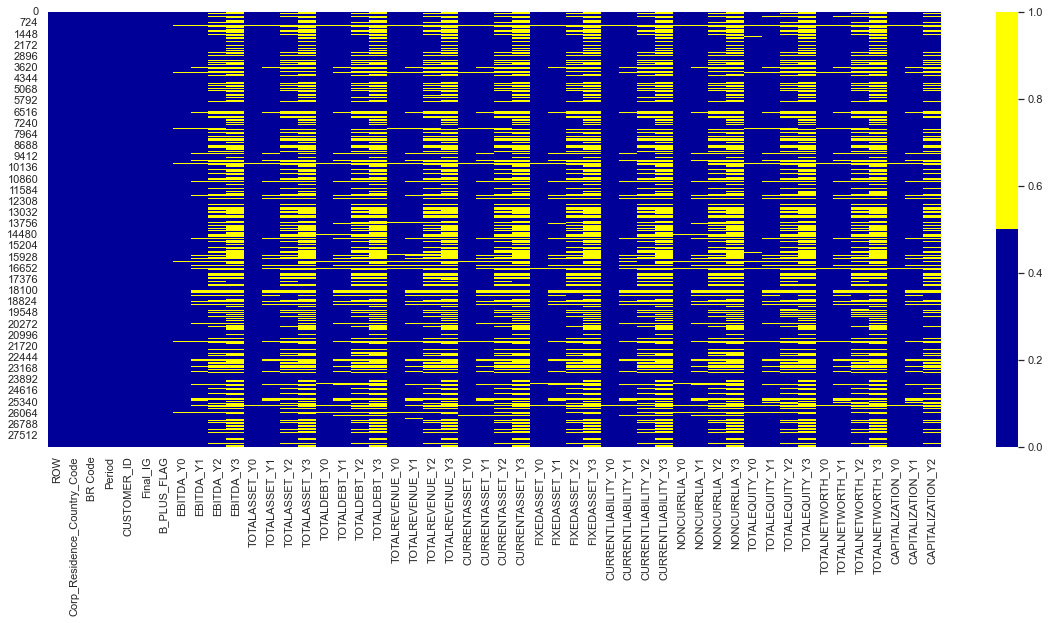

In [40]:
# Look for missing data
cols = df1.columns[:50] # first 50 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
plt.figure(figsize = (20,8)) 
print("Canadian Companies Missing Values Heatmap:")
sns.heatmap(df1[cols].isnull(), cmap=sns.color_palette(colours))

General Companies Missing Values Heatmap:


<AxesSubplot:>

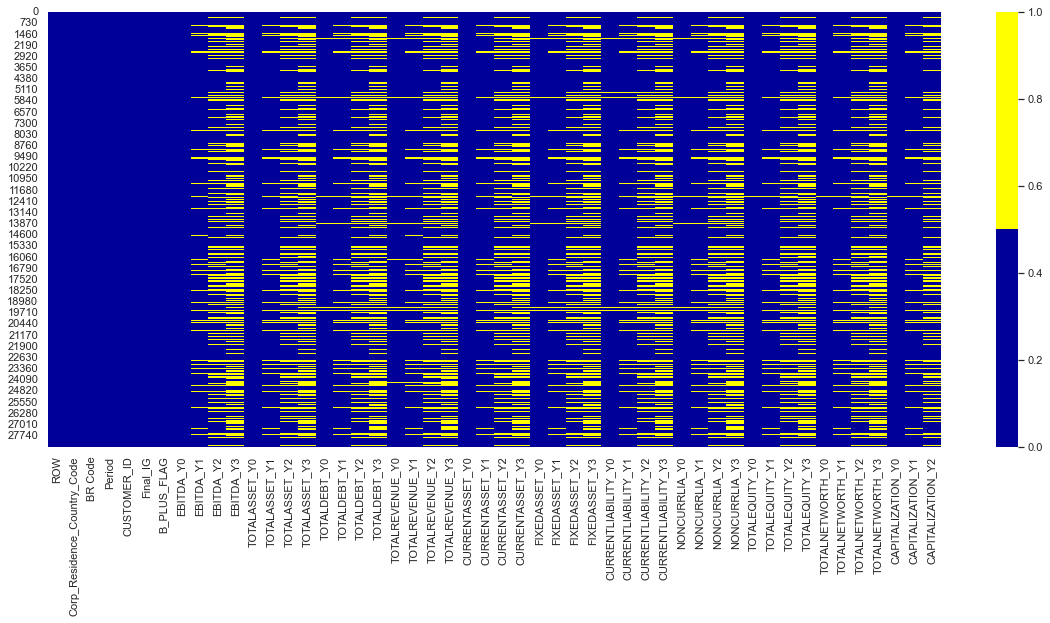

In [41]:
# Look for missing data -- General Companies 
cols = df2.columns[:50] # first 50 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
plt.figure(figsize = (20,8))
print("General Companies Missing Values Heatmap:")
sns.heatmap(df2[cols].isnull(), cmap=sns.color_palette(colours))

At first galance, we can see that the general companies dataset is missing fewer values than the first one. 

In [42]:
# % of missing.  -- Here we can see how about 30 of the columns are missing 50% or more of their data
hash_tbl = {}
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    hash_tbl["{}".format(col)] = round(pct_missing*100)
    
print("Percentage of Missing Values in Each Column for Canadian Companies:")
{k: v for k, v in sorted(hash_tbl.items(), key=lambda item: item[1])}

Percentage of Missing Values in Each Column for Canadian Companies:


{'ROW': 0,
 'Corp_Residence_Country_Code': 0,
 'BR Code': 0,
 'Period': 0,
 'CUSTOMER_ID': 0,
 'Final_IG': 0,
 'B_PLUS_FLAG': 0,
 'TOTALASSET_Y0': 1,
 'EBITDA_Y0': 2,
 'FIXEDASSET_Y0': 2,
 'CURRENTLIABILITY_Y0': 2,
 'EBITDAR_Y0': 2,
 'NETPROFIT_Y0': 2,
 'NETSALES_Y0': 2,
 'OPERPROFIT_Y0': 2,
 'TOTALDEBT_Y0': 3,
 'TOTALREVENUE_Y0': 3,
 'CURRENTASSET_Y0': 3,
 'NONCURRLIA_Y0': 3,
 'TOTALEQUITY_Y0': 3,
 'TOTALNETWORTH_Y0': 3,
 'CAPITALIZATION_Y0': 3,
 'TOTINTEXP_Y0': 3,
 'LEASERENTEXP_Y0': 3,
 'tangibleNetWorth_Y0': 3,
 'FIXEDCHARGECOV_Y0': 3,
 'DEBTSERVCOV_Y0': 3,
 'ASSETTURNOVER_Y0': 3,
 'RETAINED_EARNINGS_Y0': 3,
 'receivabledays_Y0': 4,
 'ARTurnover_Y0': 4,
 'Inventory_Y0': 4,
 'CCE_Y0': 4,
 'payableDAYS_Y0': 7,
 'EBITDA_Y1': 8,
 'TOTALASSET_Y1': 8,
 'FIXEDASSET_Y1': 8,
 'CURRENTLIABILITY_Y1': 8,
 'EBITDAR_Y1': 8,
 'NETPROFIT_Y1': 8,
 'OPERPROFIT_Y1': 8,
 'TOTALREVENUE_Y1': 9,
 'CURRENTASSET_Y1': 9,
 'NONCURRLIA_Y1': 9,
 'TOTALNETWORTH_Y1': 9,
 'CAPITALIZATION_Y1': 9,
 'LEASERENTEXP_Y1

In [43]:
# % of missing data for general industries -- We notice that the general companies actually have less missing data
hash_tbl = {}
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    hash_tbl["{}".format(col)] = round(pct_missing*100)
    
print("Percentage of Missing Values in Each Column for General Companies:")
{k: v for k, v in sorted(hash_tbl.items(), key=lambda item: item[1])}

Percentage of Missing Values in Each Column for General Companies:


{'ROW': 0,
 'Corp_Residence_Country_Code': 0,
 'BR Code': 0,
 'Period': 0,
 'CUSTOMER_ID': 0,
 'Final_IG': 0,
 'B_PLUS_FLAG': 0,
 'EBITDA_Y0': 0,
 'TOTALASSET_Y0': 0,
 'CURRENTASSET_Y0': 0,
 'TOTALEQUITY_Y0': 0,
 'TOTALNETWORTH_Y0': 0,
 'CAPITALIZATION_Y0': 0,
 'EBITDAR_Y0': 0,
 'tangibleNetWorth_Y0': 0,
 'NETPROFIT_Y0': 0,
 'NETSALES_Y0': 0,
 'OPERPROFIT_Y0': 0,
 'TOTALDEBT_Y0': 1,
 'FIXEDASSET_Y0': 1,
 'CURRENTLIABILITY_Y0': 1,
 'NONCURRLIA_Y0': 1,
 'TOTINTEXP_Y0': 1,
 'LEASERENTEXP_Y0': 1,
 'FIXEDCHARGECOV_Y0': 1,
 'DEBTSERVCOV_Y0': 1,
 'RETAINED_EARNINGS_Y0': 1,
 'CCE_Y0': 1,
 'TOTALREVENUE_Y0': 2,
 'receivabledays_Y0': 2,
 'ASSETTURNOVER_Y0': 2,
 'ARTurnover_Y0': 2,
 'INVENTORY_Y0': 2,
 'payableDAYS_Y0': 3,
 'EBITDA_Y1': 7,
 'TOTALASSET_Y1': 7,
 'CURRENTASSET_Y1': 7,
 'CAPITALIZATION_Y1': 7,
 'EBITDAR_Y1': 7,
 'INVENTORYDAYS_Y0': 7,
 'tangibleNetWorth_Y1': 7,
 'NETPROFIT_Y1': 7,
 'NETSALES_Y1': 7,
 'OPERPROFIT_Y1': 7,
 'TOTALDEBT_Y1': 8,
 'FIXEDASSET_Y1': 8,
 'CURRENTLIABILITY_Y1'

In [44]:
# Lets see how many total values are missing
print("Canadian Companies missing Values:", df1.isnull().sum().sum())
print("General Companies missing Values:", df2.isnull().sum().sum()) # About 18k less NA's

Canadian Companies missing Values: 798803
General Companies missing Values: 629385


In [45]:
##Let's look at if unique identifiers are repeated
#If the percentage of a dataset has less than 60% of the values repeated, it will be highlighted
unique_identifiers = ['CUSTOMER_ID','BR Code','Corp_Residence_Country_Code']
dataframes = [df1, df2]
dataframe_names = ['df1','df2']
cutoff = 60

for index, dataframe in enumerate(dataframes):
  print(f'Assessing {dataframe_names[index]}')
  for col in dataframe.columns:
    check_nunique = dataframe[col].nunique()/dataframe[col].count() * 100
    if check_nunique <= cutoff:
      print(f'{check_nunique}% of {col} in {dataframe_names[index]} has unique values')
  print('\n')

Assessing df1
0.010629251700680272% of Corp_Residence_Country_Code in df1 has unique values
0.37556689342403626% of BR Code in df1 has unique values
0.07794784580498866% of Period in df1 has unique values
42.97052154195011% of CUSTOMER_ID in df1 has unique values
0.05668934240362812% of Final_IG in df1 has unique values
0.007086167800453515% of B_PLUS_FLAG in df1 has unique values


Assessing df2
0.27051714446318154% of Corp_Residence_Country_Code in df2 has unique values
0.41104553119730186% of BR Code in df2 has unique values
0.08431703204047217% of Period in df2 has unique values
39.31281618887015% of CUSTOMER_ID in df2 has unique values
0.06323777403035413% of Final_IG in df2 has unique values
0.0070264193367060145% of B_PLUS_FLAG in df2 has unique values




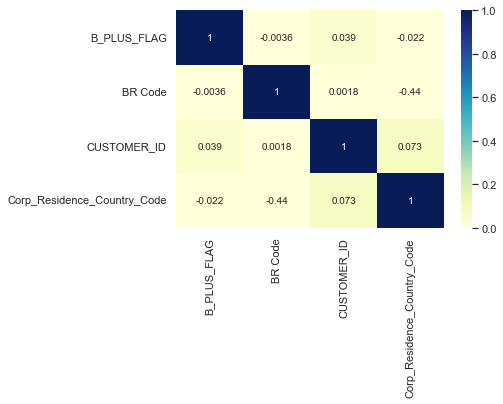

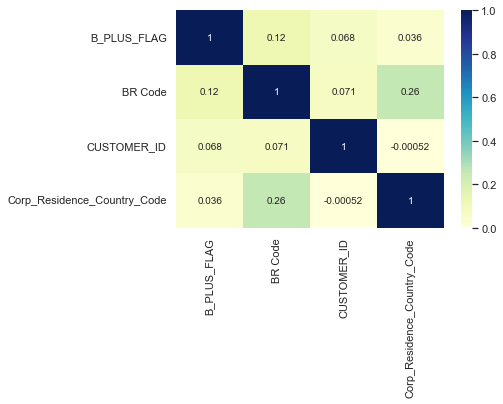

In [46]:
#Lets compare how often these repeated values are classified as a risky investment
#B_PLUS_FLAG '0' is considered a risky investment

dataframes = [df1, df2]
dataframe_names = ['df1','df2']

features = ['B_PLUS_FLAG','BR Code',"CUSTOMER_ID",'Corp_Residence_Country_Code']

#Covariance Matrices Coefficient between B_PLUS_FLAG:
for index, dataframe in enumerate(dataframes):
  data = dataframe.filter(items=features,axis=1)
  normalized_data = (data-data.mean())/data.std() #Mean normalization
  # normalized_data = (data-data.min())/(data.max()-data.min()) #min_max normalization
  dataplot = sns.heatmap(normalized_data.cov(), cmap="YlGnBu", annot=True, vmax=1,vmin=0)
  plt.show()

These results indicate that there is no covariance between any of the repeated features and B_PLUS_FLAG.**However**, because B_PLUS_FLAG is a categorical variable, an ANOVA is required to see the importance of each variable in B_PLUS_FLAG

In [47]:
dataframes = [df1, df2]
dataframe_names = ['df1','df2']

features = ['B_PLUS_FLAG','BR Code',"CUSTOMER_ID",'Corp_Residence_Country_Code']

features_test_df = df1[features]
# features_test_df.set_index('B_PLUS_FLAG', inplace=True)

repeated_customer_IDs = features_test_df.value_counts()
all_customers = []
count_customers = {}
for customer in features_test_df['CUSTOMER_ID']:
  if customer in count_customers.keys():
    count_customers[customer] += 1
  else: count_customers[customer] = 1

repeat_customers = []
for key in count_customers.keys():
  if count_customers[key] > 1:
    repeat_customers.append(key)

repeat_customers.sort()
print(repeat_customers[:20])

[0, 1, 3, 5, 6, 10, 11, 12, 13, 15, 16, 17, 18, 21, 24, 25, 28, 29, 30, 32]


## Data Cleaning Methods <a class="anchor" id="2.2"></a>
### Data Prep -- Column Types, Date Manipulations, Fixing infinity values <a class="anchor" id="2.2.1"></a>


In [48]:
# Fix the object type column to datetime
df1["Date"] = pd.to_datetime(df1.Period)
df2["Date"] = pd.to_datetime(df1.Period)

# Drop the object column
df1 = df1.drop(['Period'], axis=1)
df2 = df2.drop(['Period'], axis=1)
df1.info() # Now we have removed the Object column, and got the date as a datetime column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28224 entries, 0 to 28223
Columns: 125 entries, ROW to Date
dtypes: datetime64[ns](1), float64(118), int64(6)
memory usage: 26.9 MB


In [49]:
# Extract year and month for df1
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month

# Do the same for df2
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month

In [50]:
# Fix the infinity Issues (Some columns have values at infinity -- Fix this )
def impute_inf(data,col):
    #Impute -inf of the column of data as the minimum of the rest
    #Impute inf of the column of data as the maximum of the rest
    data.loc[data[col] == -np.inf, col] = data.loc[(data[col] > -np.inf) & (data[col] < np.inf),col].min()
    data.loc[data[col] == np.inf, col] = data.loc[(data[col] < np.inf) & (data[col] < np.inf),col].max()

    return data

# Replace all -/+ inf values with min and max values of the dataset 
for col in df1.columns:
    if col in ["Date","Period"]: pass
    else: df1 = impute_inf(df1,col)

# Do the same for General Companies 
for col in df2.columns:
    if col in ["Date","Period"]: pass
    else: df2 = impute_inf(df2,col)

In [51]:
df1.head()

ROW  Corp_Residence_Country_Code  BR Code  CUSTOMER_ID  Final_IG  \
0   5662                            1        5         1576         5   
1  16369                            1        5         4545         7   
2   2326                            0       12          648         8   
3  38131                            0       19        13395         5   
4  36605                            0       19        12998         6   

   B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
0            1  575863.911214  602838.635998  583646.469630  614602.866245   
1            1  599469.364624  615373.028208  612705.047096            NaN   
2            1  613829.072017  575020.270272            NaN            NaN   
3            1  585059.299344  581915.869330  594033.887481  609965.034011   
4            1  605966.227164  593540.797737            NaN            NaN   

   TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3   TOTALDEBT_Y0  \
0  619611.510181  621095.725446  611355.907673  582433.004400  623105.791017   
1  608126.531748  601435.154115  587550.520995            NaN  627335.355343   
2  608391.483917  611859.108037            NaN            NaN  585464.960100   
3  591791.219692  598332.776102  589877.849288  622230.836194  584513.060799   
4  582546.955793  614212.207680            NaN            NaN  590177.329836   

    TOTALDEBT_Y1   TOTALDEBT_Y2   TOTALDEBT_Y3  TOTALREVENUE_Y0  \
0  596800.177680  600460.033208  598408.339905    611355.411490   
1  611300.879046  572542.268654            NaN    604626.757034   
2  571781.269380            NaN            NaN    608591.366569   
3  626767.691011  625743.779183  573802.856646    615999.168162   
4  570997.852457            NaN            NaN    607879.645878   

   TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  CURRENTASSET_Y0  \
0    589592.109008    605336.777910    574789.603998    620745.952718   
1    586282.226249    624691.726730              NaN    596315.871786   
2    578175.200440              NaN              NaN    618999.144319   
3    588623.823558    600443.812695    633589.116171    582358.584899   
4    628042.392612              NaN              NaN    624481.204725   

   CURRENTASSET_Y1  CURRENTASSET_Y2  CURRENTASSET_Y3  FIXEDASSET_Y0  \
0    621004.600446    614991.732391    604478.517167  609095.636450   
1    609786.889797    620321.870767              NaN  577715.935070   
2    614118.293569              NaN              NaN  578343.317529   
3    612497.219818    606794.985460    589340.181176  621919.270235   
4    620443.236288              NaN              NaN  581316.994347   

   FIXEDASSET_Y1  FIXEDASSET_Y2  FIXEDASSET_Y3  CURRENTLIABILITY_Y0  \
0  600147.701765  589971.619360  580405.105567        578103.988392   
1  576662.704616  582062.515093            NaN        616376.771099   
2  575530.917780            NaN            NaN        603655.551037   
3  607400.754064  581688.692973  633939.157288        620046.519867   
4  618157.473873            NaN            NaN        594651.641147   

   CURRENTLIABILITY_Y1  CURRENTLIABILITY_Y2  CURRENTLIABILITY_Y3  \
0        577109.531117        574090.626783        583030.371565   
1        604827.131130        599463.087501                  NaN   
2        574183.093293                  NaN                  NaN   
3        607197.874782        589234.421690        615945.241601   
4        588273.242403                  NaN                  NaN   

   NONCURRLIA_Y0  NONCURRLIA_Y1  NONCURRLIA_Y2  NONCURRLIA_Y3  TOTALEQUITY_Y0  \
0  600890.935743  604975.472270  600103.052065  601804.995337   596259.219747   
1  584268.408156  615338.209036  617623.837767            NaN   599915.942888   
2  605298.293603  598985.457637            NaN            NaN   577735.145730   
3  624582.882164  571604.744174  618284.670890  582971.670808   601679.290137   
4  619814.409081  612323.296890            NaN            NaN   604318.176057   

   TOTALEQUITY_Y1  TOTAL

## Generate a Missing Data Label

In [52]:
missing_label = []
for i in range(len(df1.index)):
    missing_values_per_row = df1.iloc[i].isnull().sum()
    if missing_values_per_row <= 15:
        missing_label.append(1)
    elif (missing_values_per_row >= 16 and missing_values_per_row <= 45):
        missing_label.append(2)
    else: 
        missing_label.append(3)
        
df1["missing_data_flag"] = missing_label

# Do the same for df2
missing_label = []
for i in range(len(df2.index)):
    missing_values_per_row = df2.iloc[i].isnull().sum()
    if missing_values_per_row <= 15:
        missing_label.append(1)
    elif (missing_values_per_row >= 16 and missing_values_per_row <= 45):
        missing_label.append(2)
    else: 
        missing_label.append(3)

df2["missing_data_flag"] = missing_label

####  Data Imputation

Imputing missing data, we tried: <br> 
Replace the rest with mean <br>
Replace the rest with median <br>
Replace the rest with Random Imputation <br>
Replace the financial columns / growth columns with previous years value <br>
Replace it with the 3 years average column <br>
Replace the rest with complex imputer (SR Imputation, Complex Iterative Imputer - KNN, etc.)<br>

In [53]:
import math
import copy
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

In [54]:
def missing_columns_func(df):
  """Returns a list of the features with missing data in a dataset"""
  missing_columns = []
  for feature in df:
    if df[feature].isna().sum() > 0: 
      missing_columns.append(feature)
  return missing_columns

def missing_columns_to_impute_func(df):
  """Returns a list of the features with missing data in a dataset for which are to be imputed on"""
  #Identify which columns need to be imputed
  fin_features_lst = fin_features_func(df)
  remove_features_lst = list(set(df.columns[:]) - set(fin_features_lst)) #Removes the non-financial features so that the regression does not use those values
  try: remove_features_lst.append('RATING_SAVE_DATE') #Hardcoded
  except: pass
  missing_columns_to_impute = missing_columns_func(df)
  for remove_feature in remove_features_lst:
    try: missing_columns_to_impute.remove(remove_feature)
    except: continue
  return missing_columns_to_impute

def fin_features_func(df):
  """Returns a list of the financial features identified in the dataset by assaying if specific key words are present in the feature's descriptions"""
  fin_features = []
  key_words = ['rating','ebitda','debt','revenue','asset','liabilit', 'equit', 'worth','capital','expense','interest','receivable','invent','payable','coverage','profit','turnover','cash','sale','earning']
  key_word_min = min(key_words, key=len)
  exclude_words = ['date']
  for index, row in data_dictionary.iterrows():
    found = False
    for feature_word in row["Description"].split(' '):
      if found == True: break #Break the loop if a financial word was found. Speeds up process
      if len(feature_word) < len(key_word_min): continue #If the word being looked at is smaller than the smallest word in the key_words list, stop and go to the next word
      for index,key_word in enumerate(key_words):
        if key_word.lower() in feature_word.lower():
          found = True
          fin_features.append(row["Column"])
          break
  return fin_features

In [55]:
# # Essentially we are filling every column with it's grouped ID's average value per column. 
def impute_average_and_constant(data,group = 'CUSTOMER_ID',constant = 0):
  """This will impute the missing values by grouping the dataset based on a shared value in a column. 
  If no groups can be made (i.e. only one dataset in a group, then the missing data will be imputed with a constant.
  
  data - the data table to be imputed on. Type = pandas dataframe
  group - the column to group by. Default is CUSTOMER_ID
  constant - the constant to impute any data that cannot be grouped. Default is 0
  
  """
  for col in data.columns:
    data[col] = data.groupby('CUSTOMER_ID')[col].apply(lambda x:x.fillna(x.mean()))

  data = data.fillna(constant)
  return data

Cross validating with simple imputers using Random Forect with:  df1
>mean 0.865 (0.001)
>median 0.865 (0.001)
>most_frequent 0.864 (0.001)
>constant 0.864 (0.001)
>mean by Customer ID + Constant 0.866 (0.001)


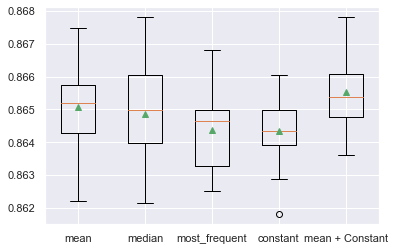

Cross validating with simple imputers using Random Forect with:  df2
>mean 0.865 (0.001)
>median 0.865 (0.001)
>most_frequent 0.864 (0.001)
>constant 0.864 (0.001)
>mean by Customer ID + Constant 0.865 (0.001)


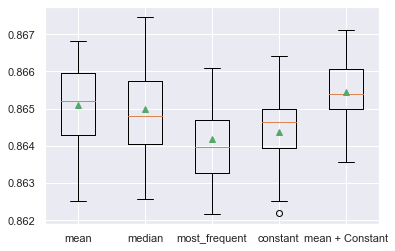

In [56]:
dataframes = [df1, df1]
dataframes_name = ['df1','df2']

for index, dataframe in enumerate(dataframes):
  print('Cross validating with simple imputers using Random Forect with: ',dataframes_name[index])
  data = copy.deepcopy(dataframe)
  data.head()
  missing_columns_to_impute = missing_columns_to_impute_func(data)
  X, y = data[missing_columns_to_impute], data['B_PLUS_FLAG'] # NOTE: B_PLUS_FLAG is the target variable

  # evaluate each strategy on the dataset
  results = []
  strategies = ['mean', 'median', 'most_frequent', 'constant']
  for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

  # # Essentially we are filling every column with it's grouped ID's average value per column. 
  data = impute_average_and_constant(data)

  X, y = data[missing_columns_to_impute], data['B_PLUS_FLAG']
  # create the modeling pipeline
  pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # store results
  results.append(scores) 
  print('>mean by Customer ID + Constant %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

  strategies.append('mean + Constant')

  # plot model performance for comparison
  plt.boxplot(results, labels=strategies, showmeans=True)
  plt.show()

In [59]:
# df1_EDA = ProfileReport(df1, title="Canadian Companies Report", minimal=True)
# df1_EDA

### Three Year Average <a class="anchor" id="2.2.3"></a>

In [58]:
def three_year_average(X,col_y0,col_y1,col_y2,col):
  X.drop(X[X[col_y0].isnull()].index, inplace = True)
  #Remove those records if the first year financial info is not available

  two_years_average = X[col_y1].notnull() & X[col_y2].isnull()
  X.loc[two_years_average, col] = X.loc[two_years_average,col_y0] * 4/7 + X.loc[two_years_average,col_y1] * 3/7

  three_years_average = X[col_y1].notnull() & X[col_y2].notnull()
  X.loc[three_years_average, col] = X.loc[three_years_average,col_y0] * 4/9 + X.loc[three_years_average,col_y1] * 3/9 + X.loc[three_years_average,col_y2] * 2/9

  return X

**Please note that the below code ONLY tests Random Forest using the data that was averaged across 3 years, and tests it with the B-Plus_Flag target. All other features like year or country code are not present.**

>mean 0.865 (0.001)
>median 0.865 (0.001)
>most_frequent 0.865 (0.001)
>constant 0.865 (0.001)


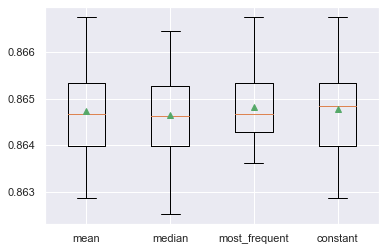

In [60]:
data_3Y = copy.deepcopy(df1)

columns = list(data_3Y.columns)
year_list = ['_Y0','_Y1','_Y2','_Y3']
year_dictionary = {}
year_dictionary['Features'] = []
for year in year_list:
  year_dictionary[year] = []
  for col in columns:
    if year in col: 
      year_dictionary[year].append(col) #Separates out the features based on year (purpose = organization)
      if col[:-3] not in year_dictionary['Features']:
        year_dictionary['Features'].append(col[:-3])


missing_columns_to_impute = year_dictionary['_Y0'] + year_dictionary['_Y1'] + year_dictionary['_Y2']
X, y = data[missing_columns_to_impute], data['B_PLUS_FLAG'] # NOTE: B_PLUS_FLAG is the target variable
# evaluate each strategy on the dataset
results = []
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
  X_imputed = X[:] #Create a copy to test the different strategies, without altering the original dataset
  imputed = SimpleImputer(strategy = s)
  X_imputed[:] = imputed.fit_transform(X)

  #Build the new dataset using three year averages
  cols_to_avg = []
  for col in year_dictionary['Features']:
    cols_to_avg.append([col + '_Y0', col + '_Y1', col + '_Y2', col + '_3YearAverage'])
  
  for col1, col2, col3, col in cols_to_avg:
    averaged_X_imputed = three_year_average(X_imputed, col1, col2, col3, col)
  
  #Remove all features that do not contain "_3YearAverage" tag
  processed_X = averaged_X_imputed.filter(like = "_3YearAverage", axis = 1)

  # create the modeling pipeline
  pipeline = Pipeline(steps=[('m', RandomForestClassifier())])
#   # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, processed_X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()


## Missing Values - Complex Imputer (Stochastic Regression)<a class="anchor" id="2.2.4"></a>

In [61]:
def random_imputation(df, feature):
  """replaces the missing values with some random observed values of the variable. 
  The method is repeated for all the variables containing missing values, after 
  which they serve as parameters in the regression model to estimate other variable values."""
  number_missing = df[feature].isnull().sum()
  observed_values = df.loc[df[feature].notnull(), feature]
  df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
  return df


In [62]:
def data_imputed_dataframe_func(df):
  #Identify which columns need to be imputed
  missing_columns_to_impute = missing_columns_to_impute_func(df)

  #Generate a dataframe with imputed values randomly allocated from another item of the same feature
  data_imputed = df[missing_columns_to_impute].copy()
  for feature in missing_columns_to_impute[:]:
      data_imputed[feature + '_imp'] = df[feature] #To separate the imputed data from the original data set, to maintain the original values
      data_imputed = random_imputation(data_imputed, feature)

  return data_imputed, missing_columns_to_impute

def deterministic_regression_func(df):
  #Generate the initial dataframe to impute off of, and identify which columns to run the regression on
  data_imputed = data_imputed_dataframe_func(df)[0]
  missing_columns_to_impute = data_imputed_dataframe_func(df)[1] 
  
  #Imputed based on deterministic regression
  deterministic_regression_data = pd.DataFrame(columns = ["Det." + name for name in missing_columns_to_impute])

  for feature in missing_columns_to_impute:
      deterministic_regression_data["Det." + feature] = data_imputed[feature + "_imp"]
      parameters = list(set(data_imputed.columns) - set(missing_columns_to_impute) - {feature + '_imp'})

      #Create a Linear Regression model to estimate the missing data
      model = linear_model.LinearRegression(positive = True)
      model.fit(X = data_imputed[parameters], y = data_imputed[feature + '_imp'])

      #The index of the missing data is preserved from the original dataframe
      deterministic_regression_data.loc[data_imputed[feature].isnull(), "Det." + feature] = model.predict(data_imputed[parameters])[data_imputed[feature].isnull()]
  
  return deterministic_regression_data

def stochastic_regression_func(df):
  #Generate the initial dataframe to impute off of, and identify which columns to run the regression on
  data_imputed = data_imputed_dataframe_func(df)[0]
  missing_columns_to_impute = data_imputed_dataframe_func(df)[1] 

  #Imputed based on stochastic regression
  stochastic_regression_data = pd.DataFrame(columns = ["Stoch." + name for name in missing_columns_to_impute])

  
  for feature in missing_columns_to_impute:

    stochastic_regression_data["Stoch." + feature] = data_imputed[feature + '_imp']
    parameters = list(set(data_imputed.columns) - set(missing_columns_to_impute) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data    
    model = linear_model.LinearRegression()
    model.fit(X = data_imputed[parameters], y = data_imputed[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(data_imputed[parameters])
    std_error = (predict[data_imputed[feature].notnull()] - data_imputed.loc[data_imputed[feature].notnull(), feature + '_imp']).std()
    
    #The index of the missing data is preserved from the original dataframe
    random_predict = np.random.normal(size = data_imputed[feature].shape[0], loc = predict, scale = std_error)
    stochastic_regression_data.loc[(data_imputed[feature].isnull()) & (random_predict > 0), "Stoch." + feature] = random_predict[(data_imputed[feature].isnull()) & (random_predict > 0)]
  return stochastic_regression_data

In [63]:
# Deterministic regression of df1
det_reg_imputed_df1 = deterministic_regression_func(df1)
det_reg_imputed_df1.head()

Det.EBITDA_Y0  Det.EBITDA_Y1  Det.EBITDA_Y2  Det.EBITDA_Y3  \
0  575863.911214  602838.635998  583646.469630  614602.866245   
1  599469.364624  615373.028208  612705.047096  604669.474319   
2  613829.072017  575020.270272  600846.582224  599366.839706   
3  585059.299344  581915.869330  594033.887481  609965.034011   
4  605966.227164  593540.797737  610878.829138  597890.763747   

   Det.TOTALASSET_Y0  Det.TOTALASSET_Y1  Det.TOTALASSET_Y2  Det.TOTALASSET_Y3  \
0      619611.510181      621095.725446      611355.907673      582433.004400   
1      608126.531748      601435.154115      587550.520995      608972.591516   
2      608391.483917      611859.108037      618755.168182      604003.200648   
3      591791.219692      598332.776102      589877.849288      622230.836194   
4      582546.955793      614212.207680      583294.620122      529865.351447   

   Det.TOTALDEBT_Y0  Det.TOTALDEBT_Y1  Det.TOTALDEBT_Y2  Det.TOTALDEBT_Y3  \
0     623105.791017     596800.177680     600460.033208     598408.339905   
1     627335.355343     611300.879046     572542.268654     602553.385995   
2     585464.960100     571781.269380     660908.410677     596323.805597   
3     584513.060799     626767.691011     625743.779183     573802.856646   
4     590177.329836     570997.852457     948572.890319     593561.074810   

   Det.TOTALREVENUE_Y0  Det.TOTALREVENUE_Y1  Det.TOTALREVENUE_Y2  \
0        611355.411490        589592.109008        605336.777910   
1        604626.757034        586282.226249        624691.726730   
2        608591.366569        578175.200440        603507.801957   
3        615999.168162        588623.823558        600443.812695   
4        607879.645878        628042.392612        594574.723963   

   Det.TOTALREVENUE_Y3  Det.CURRENTASSET_Y0  Det.CURRENTASSET_Y1  \
0        574789.603998        620745.952718        621004.600446   
1        620919.090310        596315.871786        609786.889797   
2        605355.077304        618999.144319        614118.293569   
3        633589.116171        582358.584899        612497.219818   
4        579594.574900        624481.204725        620443.236288   

   Det.CURRENTASSET_Y2  Det.CURRENTASSET_Y3  Det.FIXEDASSET_Y0  \
0        614991.732391        604478.517167      609095.636450   
1        620321.870767        627125.078965      577715.935070   
2        648975.302336        623556.246230      578343.317529   
3        606794.985460        589340.181176      621919.270235   
4        598346.663086        585988.392530      581316.994347   

   Det.FIXEDASSET_Y1  Det.FIXEDASSET_Y2  Det.FIXEDASSET_Y3  \
0      600147.701765      589971.619360      580405.105567   
1      576662.704616      582062.515093      586441.486749   
2      575530.917780      653711.345981      623167.367514   
3      607400.754064      581688.692973      633939.157288   
4      618157.473873      598797.854587      562456.450236   

   Det.CURRENTLIABILITY_Y0  Det.CURRENTLIABILITY_Y1  Det.CURRENTLIABILITY_Y2  \
0            578103.988392            577109.531117            574090.626783   
1            616376.771099            604827.131130            599463.087501   
2            603655.551037            574183.093293            617096.653779   
3            620046.519867            607197.874782            589234.421690   
4            594651.641147            588273.242403            578431.387295   

   Det.CURRENTLIABILITY_Y3  Det.NONCURRLIA_Y0  Det.NONCURRLIA_Y1  \
0            583030.371565      600890.935743      604975.472270   
1            593796.423008      584268.408156      615338.209036   
2            607711.967907      605298.293603      598985.457637   
3            615945.241601      624582.882164      571604.744174   
4            567552.478080      619814.409081      612323.296890   

   Det.NONCURRLIA_Y2  Det.NONCURRLIA_Y3  Det.TOTALEQUITY_Y0  \
0      600103.052065      601804.995337       596259.219747   
1      617623.837767      601315.017339       599915.94288

In [64]:
#Deterministic regression of df2
det_reg_imputed_df2 = deterministic_regression_func(df2)
det_reg_imputed_df2.head()

Det.EBITDA_Y1  Det.EBITDA_Y2  Det.EBITDA_Y3  Det.TOTALASSET_Y0  \
0  341575.264490  368053.254720  370696.187829       3.706175e+05   
1  593272.587785  606298.959960  509377.247299       3.569760e+06   
2  394182.092405  380051.883962  383669.693000       6.441022e+05   
3  371786.373645  371542.067484  365204.228853       3.846639e+05   
4  367450.033454  358297.870364 -998290.998580       3.516819e+05   

   Det.TOTALASSET_Y1  Det.TOTALASSET_Y2  Det.TOTALASSET_Y3  Det.TOTALDEBT_Y0  \
0       3.497885e+05       3.485696e+05       3.757753e+05      3.755110e+05   
1       2.232579e+06       2.209726e+06       1.892110e+06      2.179446e+06   
2       6.050513e+05       6.206603e+05       6.305246e+05      4.253858e+05   
3       3.789517e+05       3.551879e+05       3.713978e+05      3.721745e+05   
4       3.563508e+05       3.427291e+05      -3.159128e+07      3.693332e+05   

   Det.TOTALDEBT_Y1  Det.TOTALDEBT_Y2  Det.TOTALDEBT_Y3  Det.TOTALREVENUE_Y0  \
0      3.726001e+05      3.606447e+05      3.735396e+05         3.560748e+05   
1      1.022687e+06      1.061187e+06      1.032433e+06         1.522408e+06   
2      3.907357e+05      4.774559e+05      4.528249e+05         7.995319e+05   
3      3.713703e+05      3.779592e+05      3.445819e+05         3.636668e+05   
4      3.623486e+05      3.399790e+05     -1.424120e+06         3.529416e+05   

   Det.TOTALREVENUE_Y1  Det.TOTALREVENUE_Y2  Det.TOTALREVENUE_Y3  \
0         3.633396e+05         3.585169e+05         3.715991e+05   
1         1.327851e+06         1.280758e+06         1.135047e+06   
2         7.199362e+05         7.406381e+05         7.131936e+05   
3         3.575831e+05         3.662552e+05         3.804336e+05   
4         3.407400e+05         3.740230e+05         2.658351e+05   

   Det.CURRENTASSET_Y0  Det.CURRENTASSET_Y1  Det.CURRENTASSET_Y2  \
0         3.434351e+05        344977.126649        367162.335140   
1         1.147513e+06        829702.295435        760807.341039   
2         5.311816e+05        514741.746178        528849.435520   
3         3.623015e+05        377101.596125        374928.690083   
4         3.715968e+05        371805.672012        346038.553821   

   Det.CURRENTASSET_Y3  Det.FIXEDASSET_Y0  Det.FIXEDASSET_Y1  \
0         3.499458e+05       3.784293e+05       3.720962e+05   
1         8.482809e+05       2.716973e+06       1.640463e+06   
2         5.845018e+05       4.444025e+05       4.533300e+05   
3         3.457777e+05       3.555814e+05       3.733798e+05   
4        -1.167658e+07       3.720567e+05       3.721733e+05   

   Det.FIXEDASSET_Y2  Det.FIXEDASSET_Y3  Det.CURRENTLIABILITY_Y0  \
0       3.688327e+05       3.472348e+05            355541.904130   
1       1.751083e+06       1.379226e+06            644352.547945   
2       4.490554e+05       4.587347e+05            481135.648099   
3       3.593706e+05       3.437278e+05            348458.696351   
4       3.614443e+05       1.927505e+05            360704.301769   

   Det.CURRENTLIABILITY_Y1  Det.CURRENTLIABILITY_Y2  Det.CURRENTLIABILITY_Y3  \
0            367439.639625            340433.991591             3.671509e+05   
1            487669.347380            497662.519665             4.813941e+05   
2            467669.404784            504347.660158             5.344994e+05   
3            361418.841014            356877.324987             3.637084e+05   
4            349895.912646            356684.002329            -2.348529e+07   

   Det.NONCURRLIA_Y0  Det.NONCURRLIA_Y1  Det.NONCURRLIA_Y2  Det.NONCURRLIA_Y3  \
0       3.534059e+05       3.557170e+05       3.530858e+05       3.409601e+05   
1       2.395843e+06       1.201515e+06       1.199559e+06       1.092157e+06   
2       4.083899e+05       4.119477e+05       4.186677e+05       4.258029e+05   
3       3.470063e+05       3.555032e+05       3.628690e+05       3.462930e+05   
4       3.717421e+05       3.443014e+05       3.418980e+05       3.461270e+05   

   Det.TOTALEQUITY_Y0  Det.TOTALEQUITY_Y1  Det

In [65]:
# Stochastic Regression for df1
stoch_reg_imputed_df1 = stochastic_regression_func(df1)
stoch_reg_imputed_df1.head()

Stoch.EBITDA_Y0  Stoch.EBITDA_Y1  Stoch.EBITDA_Y2  Stoch.EBITDA_Y3  \
0    575863.911214    602838.635998    583646.469630    614602.866245   
1    599469.364624    615373.028208    612705.047096    681260.597538   
2    613829.072017    575020.270272    620079.215957    468916.231627   
3    585059.299344    581915.869330    594033.887481    609965.034011   
4    605966.227164    593540.797737    639437.381774    656875.524294   

   Stoch.TOTALASSET_Y0  Stoch.TOTALASSET_Y1  Stoch.TOTALASSET_Y2  \
0        619611.510181        621095.725446        611355.907673   
1        608126.531748        601435.154115        587550.520995   
2        608391.483917        611859.108037        523039.454432   
3        591791.219692        598332.776102        589877.849288   
4        582546.955793        614212.207680        669166.428660   

   Stoch.TOTALASSET_Y3  Stoch.TOTALDEBT_Y0  Stoch.TOTALDEBT_Y1  \
0        582433.004400       623105.791017       596800.177680   
1        819732.137178       627335.355343       611300.879046   
2        640165.079044       585464.960100       571781.269380   
3        622230.836194       584513.060799       626767.691011   
4        619646.926699       590177.329836       570997.852457   

   Stoch.TOTALDEBT_Y2  Stoch.TOTALDEBT_Y3  Stoch.TOTALREVENUE_Y0  \
0       600460.033208       598408.339905          611355.411490   
1       572542.268654       593599.491410          604626.757034   
2       535578.983880       600714.034412          608591.366569   
3       625743.779183       573802.856646          615999.168162   
4       552740.760313       613269.177012          607879.645878   

   Stoch.TOTALREVENUE_Y1  Stoch.TOTALREVENUE_Y2  Stoch.TOTALREVENUE_Y3  \
0          589592.109008          605336.777910          574789.603998   
1          586282.226249          624691.726730          701596.111425   
2          578175.200440          586887.980949          740507.093950   
3          588623.823558          600443.812695          633589.116171   
4          628042.392612          585036.242172          658220.521693   

   Stoch.CURRENTASSET_Y0  Stoch.CURRENTASSET_Y1  Stoch.CURRENTASSET_Y2  \
0          620745.952718          621004.600446          614991.732391   
1          596315.871786          609786.889797          620321.870767   
2          618999.144319          614118.293569          330888.499242   
3          582358.584899          612497.219818          606794.985460   
4          624481.204725          620443.236288          415279.817251   

   Stoch.CURRENTASSET_Y3  Stoch.FIXEDASSET_Y0  Stoch.FIXEDASSET_Y1  \
0          604478.517167        609095.636450        600147.701765   
1          598208.293650        577715.935070        576662.704616   
2          533793.808279        578343.317529        575530.917780   
3          589340.181176        621919.270235        607400.754064   
4          596006.651498        581316.994347        618157.473873   

   Stoch.FIXEDASSET_Y2  Stoch.FIXEDASSET_Y3  Stoch.CURRENTLIABILITY_Y0  \
0        589971.619360        580405.105567              578103.988392   
1        582062.515093        706252.466375              616376.771099   
2        467396.353714        591433.924684              603655.551037   
3        581688.692973        633939.157288              620046.519867   
4        551540.430081        592743.265834              594651.641147   

   Stoch.CURRENTLIABILITY_Y1  Stoch.CURRENTLIABILITY_Y2  \
0              577109.531117              574090.626783   
1              604827.131130              599463.087501   
2              574183.093293              643459.411527   
3              607197.874782              589234.421690   
4              588273.242403              580327.320511   

   Stoch.CURRENTLIABILITY_Y3  Stoch.NONCURRLIA_Y0  Stoch.NONCURRLIA_Y1  \
0              583030.371565        600890.935743        604975.472270   
1              666797.290316        584268.408156        615338.209036   
2              3

In [66]:
# Stochastic Regression for df2
stoch_reg_imputed_df2 = stochastic_regression_func(df2)
stoch_reg_imputed_df2.head()

Stoch.EBITDA_Y1  Stoch.EBITDA_Y2  Stoch.EBITDA_Y3  Stoch.TOTALASSET_Y0  \
0    341575.264490    368053.254720     3.706962e+05         3.706175e+05   
1    593272.587785    606298.959960     5.093772e+05         3.569760e+06   
2    394182.092405    380051.883962     3.836697e+05         6.441022e+05   
3    371786.373645    371542.067484     3.652042e+05         3.846639e+05   
4    367450.033454    358297.870364     1.028937e+07         3.516819e+05   

   Stoch.TOTALASSET_Y1  Stoch.TOTALASSET_Y2  Stoch.TOTALASSET_Y3  \
0         3.497885e+05         3.485696e+05         3.757753e+05   
1         2.232579e+06         2.209726e+06         1.892110e+06   
2         6.050513e+05         6.206603e+05         6.305246e+05   
3         3.789517e+05         3.551879e+05         3.713978e+05   
4         3.563508e+05         3.427291e+05         5.669312e+05   

   Stoch.TOTALDEBT_Y0  Stoch.TOTALDEBT_Y1  Stoch.TOTALDEBT_Y2  \
0        3.755110e+05        3.726001e+05        3.606447e+05   
1        2.179446e+06        1.022687e+06        1.061187e+06   
2        4.253858e+05        3.907357e+05        4.774559e+05   
3        3.721745e+05        3.713703e+05        3.779592e+05   
4        3.693332e+05        3.623486e+05        3.399790e+05   

   Stoch.TOTALDEBT_Y3  Stoch.TOTALREVENUE_Y0  Stoch.TOTALREVENUE_Y1  \
0        3.735396e+05           3.560748e+05           3.633396e+05   
1        1.032433e+06           1.522408e+06           1.327851e+06   
2        4.528249e+05           7.995319e+05           7.199362e+05   
3        3.445819e+05           3.636668e+05           3.575831e+05   
4        3.452581e+05           3.529416e+05           3.407400e+05   

   Stoch.TOTALREVENUE_Y2  Stoch.TOTALREVENUE_Y3  Stoch.CURRENTASSET_Y0  \
0           3.585169e+05           3.715991e+05           3.434351e+05   
1           1.280758e+06           1.135047e+06           1.147513e+06   
2           7.406381e+05           7.131936e+05           5.311816e+05   
3           3.662552e+05           3.804336e+05           3.623015e+05   
4           3.740230e+05           3.496477e+07           3.715968e+05   

   Stoch.CURRENTASSET_Y1  Stoch.CURRENTASSET_Y2  Stoch.CURRENTASSET_Y3  \
0          344977.126649          367162.335140          349945.750055   
1          829702.295435          760807.341039          848280.904223   
2          514741.746178          528849.435520          584501.847521   
3          377101.596125          374928.690083          345777.748609   
4          371805.672012          346038.553821          447756.454842   

   Stoch.FIXEDASSET_Y0  Stoch.FIXEDASSET_Y1  Stoch.FIXEDASSET_Y2  \
0         3.784293e+05         3.720962e+05         3.688327e+05   
1         2.716973e+06         1.640463e+06         1.751083e+06   
2         4.444025e+05         4.533300e+05         4.490554e+05   
3         3.555814e+05         3.733798e+05         3.593706e+05   
4         3.720567e+05         3.721733e+05         3.614443e+05   

   Stoch.FIXEDASSET_Y3  Stoch.CURRENTLIABILITY_Y0  Stoch.CURRENTLIABILITY_Y1  \
0         3.472348e+05              355541.904130              367439.639625   
1         1.379226e+06              644352.547945              487669.347380   
2         4.587347e+05              481135.648099              467669.404784   
3         3.437278e+05              348458.696351              361418.841014   
4         3.743424e+05              360704.301769              349895.912646   

   Stoch.CURRENTLIABILITY_Y2  Stoch.CURRENTLIABILITY_Y3  Stoch.NONCURRLIA_Y0  \
0              340433.991591               3.671509e+05         3.534059e+05   
1              497662.519665               4.813941e+05         2.395843e+06   
2              504347.660158               5.344994e+05         4.083899e+05   
3              356877.324987               3.637084e+05         3.470063e+05   
4              356684.002329               1.255027e+09         3.717421e+05   

   Stoch.NONCURRLIA_Y1  Stoch.NONCURRLIA_Y2  Stoch.N

0
1


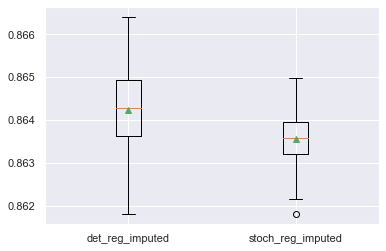

In [67]:
results = []
regressions = [det_reg_imputed_df1,stoch_reg_imputed_df1,]
names = ['det_reg_imputed','stoch_reg_imputed']
# X, y = df1[missing_columns_to_impute], df1['B_PLUS_FLAG'] # NOTE: B_PLUS_FLAG is the target variable


for index, regression in enumerate(regressions):
  print(index)
  # # Essentially we are filling every column with it's grouped ID's average value per column. 
  data = regression

  missing_columns_to_impute = data_imputed_dataframe_func(df1)[1] 
  missing_columns = []
  if index == 0:
    for item in missing_columns_to_impute: missing_columns.append("Det."+item)
  else:
    for item in missing_columns_to_impute: missing_columns.append("Stoch."+item)

  X, y = data[missing_columns], df1['B_PLUS_FLAG']
  pipeline = Pipeline(steps=[('m', RandomForestClassifier())])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # store results
  results.append(scores)

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [69]:
regressed_data = [det_reg_imputed_df1,det_reg_imputed_df2,stoch_reg_imputed_df1,stoch_reg_imputed_df2]
regressed_data_name = ["Deterministic Regression of df1", "Deterministic Regression of df2", "Stochastic Regression of df1", "Stochastic Regression of df2"]
for i in range(4):
  print(f'{avg_num_missing_values(regressed_data[i])} avg. number of missing values in {regressed_data_name[i]}')

NameError: name 'avg_num_missing_values' is not defined

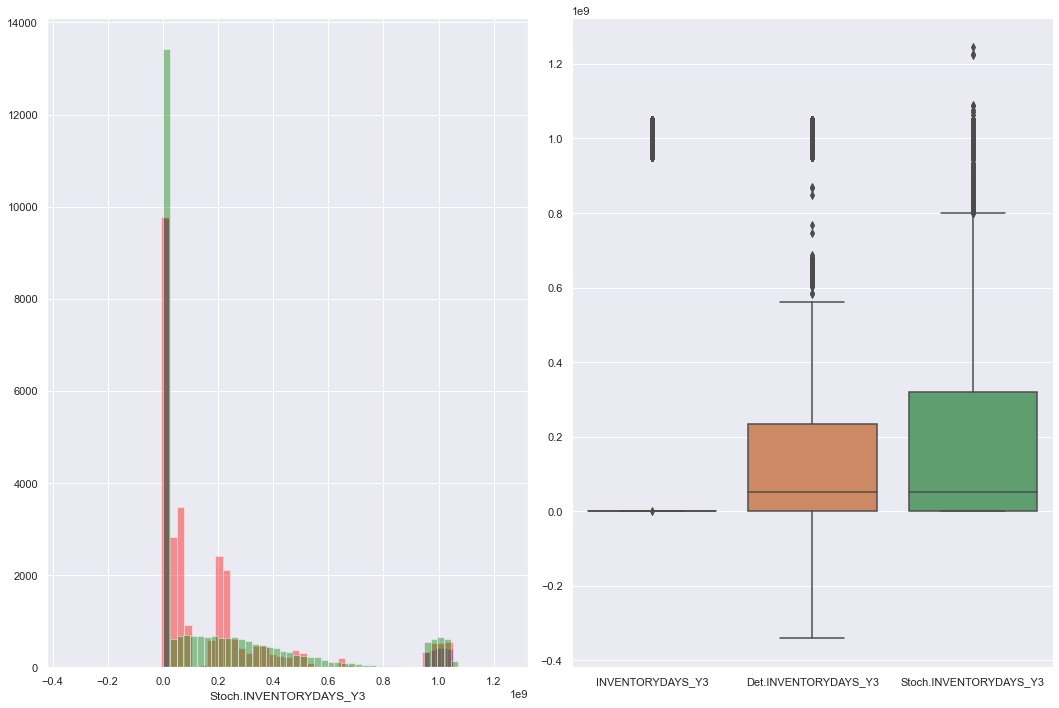

In [70]:
sns.set()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(15, 10)

variable = 'INVENTORYDAYS_Y3' #Initial assessment showed inventory days had the highest number of missing values
sns.distplot(df1[variable].dropna(), kde = False, ax = axes[0], color = 'blue')
sns.distplot(det_reg_imputed_df1["Det." + variable], kde = False, ax = axes[0], color = 'red')
sns.distplot(stoch_reg_imputed_df1["Stoch." + variable], kde = False, ax = axes[0], color = 'green')

sns.boxplot(data = pd.concat([df1[variable], det_reg_imputed_df1["Det." + variable], stoch_reg_imputed_df1['Stoch.' + variable]],axis = 1), ax = axes[1])

plt.tight_layout()

In [ ]:
# Create a list of all imputed methods here -- (Need to create do some growth / financial average imputation)
# We will just use df1 for now to test the accuracy of different imputation methods
# Run the LR and DC models to see how well the datasets perform.  

In [71]:
"""
from google.colab import files

det_reg_imputed_df1.to_csv("det_reg_imputed_df1.csv", index=False)
files.download('det_reg_imputed_df1.csv')
det_reg_imputed_df2.to_csv("det_reg_imputed_df2.csv", index=False)
files.download('det_reg_imputed_df2.csv')
stoch_reg_imputed_df1.to_csv("stoch_reg_imputed_df1.csv", index=False)
files.download('stoch_reg_imputed_df1.csv')
stoch_reg_imputed_df2.to_csv("stoch_reg_imputed_df2.csv", index=False)
files.download('stoch_reg_imputed_df2.csv')
"""
print(" ")

In [72]:
#### What if we fill it by grouped ID means / column?
df1.groupby("CUSTOMER_ID").mean()

ROW  Corp_Residence_Country_Code  BR Code  Final_IG  \
CUSTOMER_ID                                                             
0                3.50                          0.0      0.0      7.00   
1                7.50                          0.0      1.0      9.00   
3               11.75                          0.0      2.0      5.25   
4               16.00                          0.0      3.0      6.00   
5               17.50                          0.0      3.0      8.00   
...               ...                          ...      ...       ...   
14027        40308.00                          0.0     21.0      7.00   
14028        40309.50                          0.0      3.0     10.00   
14029        40311.00                          1.0      5.0      9.00   
14030        40314.00                          0.0     18.0      7.00   
14031        40319.00                          0.0      3.0      9.00   

             B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2  \
CUSTOMER_ID                                                             
0                    1.0  607305.179783  602401.465145  599387.899213   
1                    0.0  619263.914349  614959.402780  582250.871692   
3                    1.0  592759.767185  601871.976674  601799.785980   
4                    1.0  638042.769331  622806.771831            NaN   
5                    1.0  592956.614780  584846.628046  600061.117388   
...                  ...            ...            ...            ...   
14027                1.0  623797.005221            NaN            NaN   
14028                0.0  577110.854554  611975.607878  603946.801980   
14029                0.0  613443.860217  613837.105115  612822.957600   
14030                1.0  607703.427075  609377.499193  602961.853341   
14031                0.5  585471.407652  603252.307311  580975.918869   

                 EBITDA_Y3  TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  \
CUSTOMER_ID                                                               
0            608043.506296  607024.396238  588572.721142  599630.389447   
1            603214.764679  591554.082075  626190.113100  609264.052648   
3            624576.922508  610840.763238  604640.944685  593801.616282   
4                      NaN  664374.565688  642162.899758            NaN   
5            582738.915236  594026.494295  608151.235448  602094.993849   
...                    ...            ...            ...            ...   
14027                  NaN  602655.189907            NaN            NaN   
14028        597155.827716  599993.567742  623652.570044  612215.929043   
14029        606593.232307  640469.013830  640810.008751  590141.674279   
14030        614603.382769  604705.531078  596410.230912  594519.123494   
14031        591291.287251  644759.214345  650520.225023  653960.125106   

             TOTALASSET_Y3   TOTALDEBT_Y0   TOTALDEBT_Y1   TOTALDEBT_Y2  \
CUSTOMER_ID                                                               
0            598484.795140  584928.586638  614610.667932  619058.416093   
1            592705.062911  622060.013110  584718.111746  592867.647794   
3            586259.475857  598765.398957  586101.286676  612301.163106   
4                      NaN  604033.343655  613696.776775            NaN   
5            602523.385715  609717.062197  612988.869630  587265.491488   
...                    ...            ...            ...            ...   
14027                  NaN  625613.835397            NaN            NaN   
14028        636289.199039  610008.430177  635054.338962  633893.557349   
14029        592313.250850  595628.778664  615471.021210  580914.942562   
14030        587566.301173  588056.023039  597636.448384  591344.627288   
14031        676407.631898  599011.375187  620478.874710  588406.323258   

              TOTALDEBT_Y3  TOTALREVENUE_Y0  TOTALREVENUE_Y1  TOTALREVENUE_Y2  \
CUSTOMER_ID                                                                     
0   

In [73]:
data = df1.copy()

In [74]:
#data['TOTALASSET_Y0']=data.groupby('CUSTOMER_ID')['TOTALASSET_Y0'].apply(lambda x:x.fillna(x.mean()))

In [75]:
# # Essentially we are filling every column with it's grouped ID's average value per column. 
def impute_average_and_constant(data,group = 'CUSTOMER_ID',constant = 0):
  """This will impute the missing values by grouping the dataset based on a shared value in a column. 
  If no groups can be made (i.e. only one dataset in a group, then the missing data will be imputed with a constant.
  
  data - the data table to be imputed on. Type = pandas dataframe
  group - the column to group by. Default is CUSTOMER_ID
  constant - the constant to impute any data that cannot be grouped. Default is 0
  
  """
  for col in data.columns:
    data[col] = data.groupby('CUSTOMER_ID')[col].apply(lambda x:x.fillna(x.mean()))

  data = data.fillna(constant)
  return data

# This is now clean, imputed data.
df1 = impute_average_and_constant(df1)
df2 = impute_average_and_constant(df2)

In [76]:
df1.isnull().sum()

ROW                            0
Corp_Residence_Country_Code    0
BR Code                        0
CUSTOMER_ID                    0
Final_IG                       0
B_PLUS_FLAG                    0
EBITDA_Y0                      0
EBITDA_Y1                      0
EBITDA_Y2                      0
EBITDA_Y3                      0
TOTALASSET_Y0                  0
TOTALASSET_Y1                  0
TOTALASSET_Y2                  0
TOTALASSET_Y3                  0
TOTALDEBT_Y0                   0
TOTALDEBT_Y1                   0
TOTALDEBT_Y2                   0
TOTALDEBT_Y3                   0
TOTALREVENUE_Y0                0
TOTALREVENUE_Y1                0
TOTALREVENUE_Y2                0
TOTALREVENUE_Y3                0
CURRENTASSET_Y0                0
CURRENTASSET_Y1                0
CURRENTASSET_Y2                0
CURRENTASSET_Y3                0
FIXEDASSET_Y0                  0
FIXEDASSET_Y1                  0
FIXEDASSET_Y2                  0
FIXEDASSET_Y3                  0
CURRENTLIA

##  Further Analysis (Barplots, Scatterplots, CustomerID, Classes, Clustering)<a class="anchor" id="2.2"></a>

In [77]:
print("Canadian Companies:")
counts_0_df1, counts_1_df1 = df1["B_PLUS_FLAG"].value_counts()[0], df1["B_PLUS_FLAG"].value_counts()[1]
print("Percentage of canadian companies where Flag == 1:", (counts_1_df1/(counts_0_df1 + counts_1_df1))*100, "%")
print("Percentage of canadian companies where Flag == 0:", (counts_0_df1/(counts_0_df1 + counts_1_df1))*100, "%")
print("General Companies:")
counts_0_df2, counts_1_df2 = df2["B_PLUS_FLAG"].value_counts()[0], df2["B_PLUS_FLAG"].value_counts()[1]
print("Percentage of canadian companies where Flag == 1:", (counts_1_df2/(counts_0_df2 + counts_1_df2))*100, "%")
print("Percentage of canadian companies where Flag == 0:", (counts_0_df2/(counts_0_df2 + counts_1_df2))*100, "%")

Canadian Companies:
Percentage of canadian companies where Flag == 1: 86.19260204081633 %
Percentage of canadian companies where Flag == 0: 13.807397959183673 %
General Companies:
Percentage of canadian companies where Flag == 1: 76.59499718943226 %
Percentage of canadian companies where Flag == 0: 23.405002810567733 %


Here we can see that the class imbalance problem persists in both datasets. <br>
Roughly, about 80% of the data is in class 1 vs 20% in class 2 for both datasets. <br>


### Correlation between variables

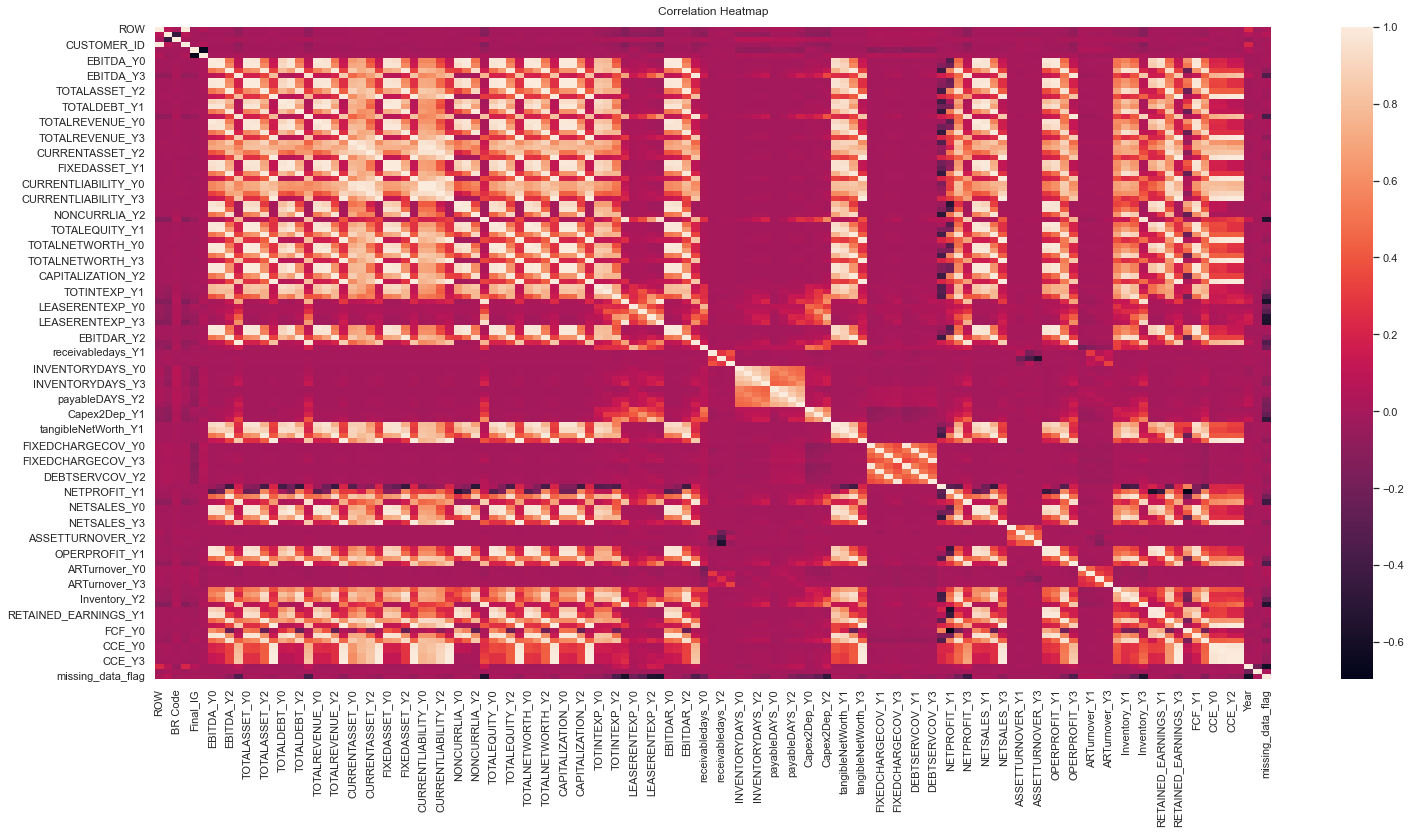

In [78]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df1.corr(), annot=False);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**K-Means Clustering**

In [79]:
# K-Means clustering
from numpy import unique
from numpy import where
import copy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

X_KMeans = copy.deepcopy(df1)
drop_features = ["Period", 'Date','Year','Month','ROW']
for drop_feature in drop_features:
  try: X_KMeans = X_KMeans.drop(drop_feature, axis = 1) #String values must be dropped for K-Means.
  except: continue
X_KMeans.fillna(X_KMeans.mean(), inplace=True)


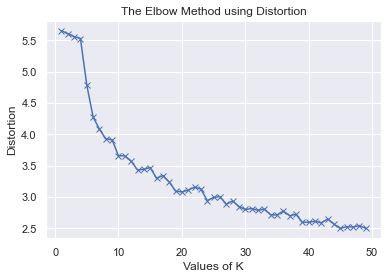

In [80]:
#Elbow Method to determine optimal number of clusters needed for K-Means
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 50)

from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_KMeans)

X = X_scaled
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Based on the above graph, the "Elbow" appears around N=6 to 12. Using 6 to identify a broader range of clusters.

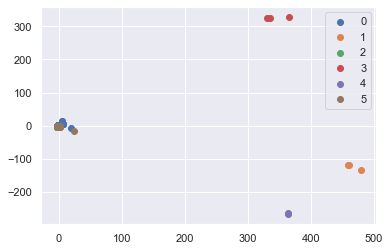

[1, 4, 6, 10, 19, 20, 21, 22, 30, 37, 48, 53, 60, 63, 68, 74, 75, 81, 82, 83, 86, 92, 93, 98, 101, 104, 112, 116, 120, 123, 126, 134, 138, 141, 146, 149, 150, 151, 159, 161, 162, 164, 170, 171, 177, 178, 185, 190, 193, 199, 200, 202, 211, 216, 229, 233, 239, 242, 258, 262, 263, 264, 268, 269, 271, 277, 278, 279, 280, 283, 288, 298, 301, 305, 308, 309, 319, 323, 324, 332, 335, 352, 357, 360, 361, 365, 373, 377, 379, 380, 389, 393, 395, 402, 404, 408, 409, 413, 414, 415, 419, 425, 426, 432, 436, 438, 446, 448, 457, 459, 460, 461, 464, 467, 474, 476, 483, 484, 489, 495, 500, 503, 508, 518, 529, 536, 545, 547, 548, 555, 559, 560, 581, 584, 586, 587, 593, 601, 607, 615, 631, 634, 643, 644, 646, 648, 650, 663, 667, 672, 675, 677, 679, 681, 686, 687, 689, 695, 696, 699, 702, 704, 708, 715, 721, 734, 735, 736, 737, 741, 743, 747, 750, 764, 768, 770, 774, 775, 777, 780, 784, 785, 787, 789, 790, 792, 794, 797, 802, 807, 815, 817, 819, 825, 828, 838, 859, 862, 866, 867, 870, 878, 879, 881, 882, 8

In [81]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_KMeans)

#Reduce dimensionality to visualize it on a 2D plane
pca = PCA(2) 
cluster_df = pca.fit_transform(X_scaled)

clusters = [6]

for n_clusters in clusters:
  model = KMeans(n_clusters=n_clusters, random_state=0)

  #predict the labels of clusters.
  label = model.fit_predict(cluster_df)
  # retrieve unique clusters
  u_labels = unique(label)


  for i in u_labels:
    plt.scatter(cluster_df[label == i , 0] , cluster_df[label == i , 1] , label = i)
  plt.legend()
  plt.show()

# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X_KMeans.index, columns=X_KMeans.columns)
X_clustered["cluster"] = label

# # Display parallel coordinates plots, 
# pd.plotting.parallel_coordinates(X_clustered, "cluster")

cluster_counts = X_clustered["cluster"].value_counts()
outlier_indices = list(X_clustered[X_clustered["cluster"] != 0].index)
print(outlier_indices)

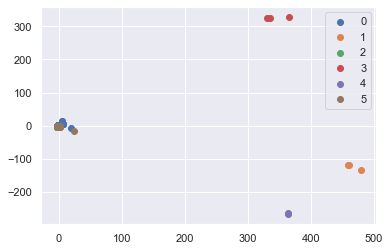

Outliers found, will reiterate to improve clustering results.
Number of KMean iterations done: 1
0    21101
2     4019
5     3096
3        3
1        3
4        2
Name: cluster, dtype: int64
Outlier Clusters are [1, 3, 4]
[1, 3, 4]
removed 8 values:


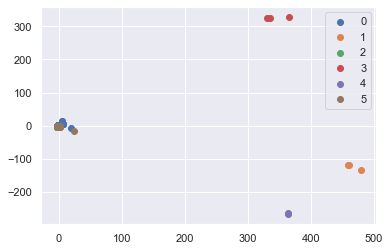

Number of KMean iterations done: 2
0    21024
3     3071
2     2717
5     1402
1        1
4        1
Name: cluster, dtype: int64
Outlier Clusters are [1, 4, 5]
[1, 4, 5]
removed 1404 values:


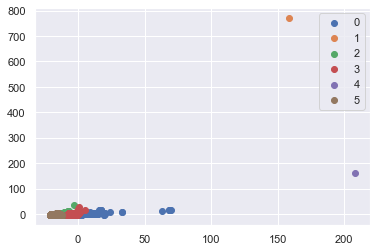

Number of KMean iterations done: 3
0    20919
3     2960
1     2522
5      253
4      142
2       16
Name: cluster, dtype: int64
Outlier Clusters are [2, 4, 5]
[2, 4, 5]
removed 411 values:


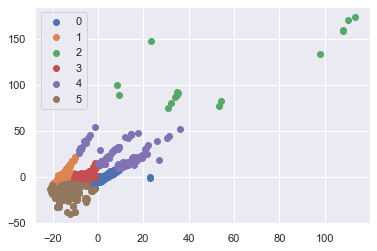

Number of KMean iterations done: 4
4    19639
5     2715
1     2382
0     1154
2      297
3      214
Name: cluster, dtype: int64
Outlier Clusters are [0, 2, 3]
[0, 2, 3]
removed 1665 values:


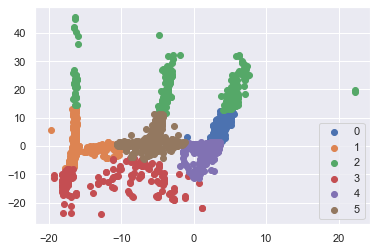

Number of KMean iterations done: 5
1    19567
2     2576
0     2314
5      151
3      107
4       21
Name: cluster, dtype: int64
Outlier Clusters are [3, 4, 5]
[3, 4, 5]
removed 279 values:


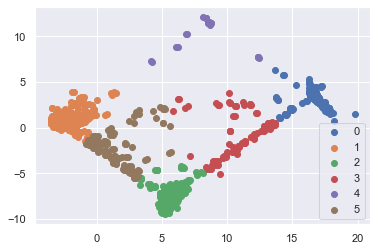

Number of KMean iterations done: 6
1    12555
3     4344
5     2610
2     2576
0     2314
4       58
Name: cluster, dtype: int64
Outlier Clusters are [4]


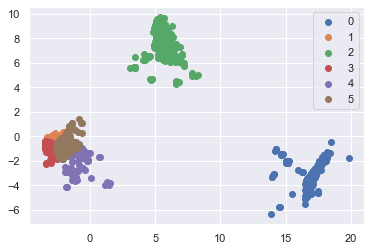

A total of 3767 outliers were removed.


<AxesSubplot:>

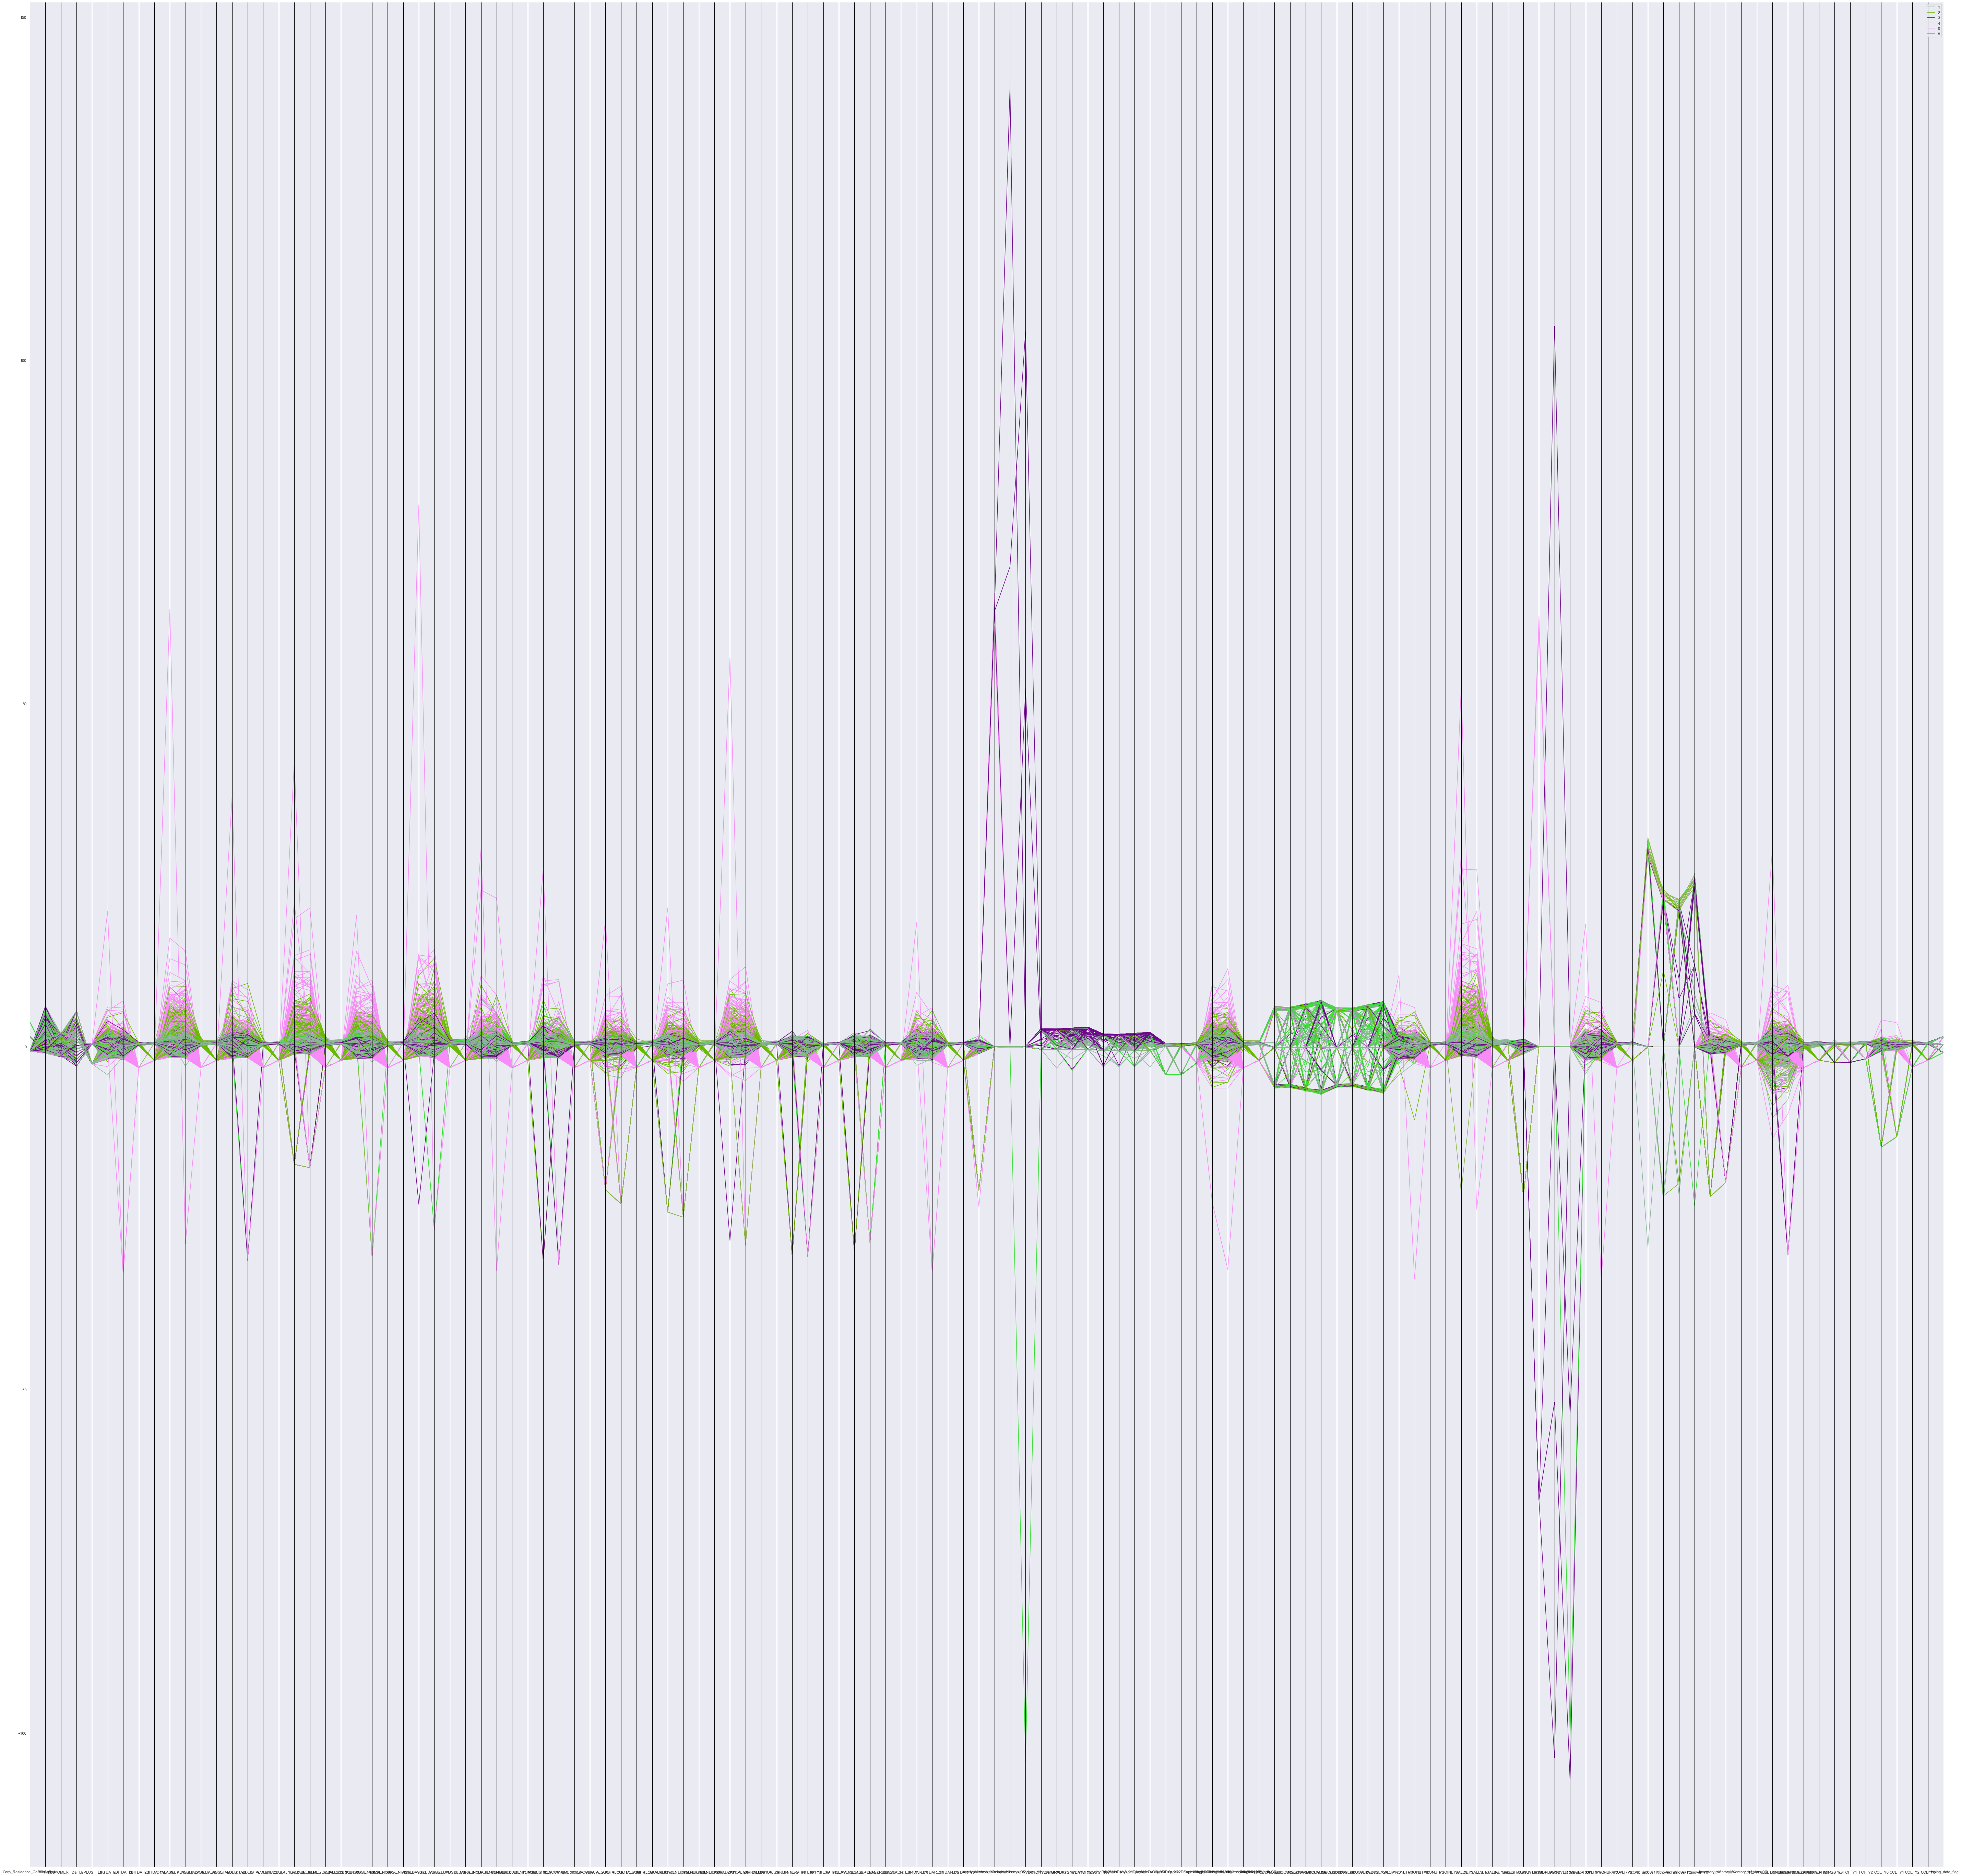

In [82]:
##Testing to remove outliers until KMeans is producing groups without having a signifcant proportion of the data in one group

def check_percentage_outlier(counts_arr):
  counts_arr = counts_arr.sort_index()
  number_of_clusters = len(counts_arr)
  total = counts_arr.sum()
  remove_clusters = []
  threshold = 0.05
  for index, count in enumerate(counts_arr):
    percentage = count / total
    if percentage < threshold: remove_clusters.append(index)
    else: continue
  if len(remove_clusters) <= math.floor(number_of_clusters * 1/3): return (False, remove_clusters) #Two was chosen arbritrarily. This means that it will permit two clusters to contain values below the threshold
  return (True, remove_clusters)

Iterations = 1
##initial K_Means Clustering
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_KMeans)

#Reduce dimensionality to visualize it on a 2D plane
pca = PCA(2) 
cluster_df = pca.fit_transform(X_scaled)
KMeans_outliers = []
clusters_to_use = 6

model = KMeans(n_clusters=clusters_to_use, random_state=0)

#predict the labels of clusters.
label = model.fit_predict(cluster_df)

# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X_KMeans.index, columns=X_KMeans.columns)
X_clustered["cluster"] = label

cluster_counts = X_clustered["cluster"].value_counts()
outlier_indices = list(X_clustered[X_clustered["cluster"] != 0].index)

#predict the labels of clusters.
label = model.fit_predict(cluster_df)
# retrieve unique clusters
u_labels = unique(label)

for i in u_labels:
  plt.scatter(cluster_df[label == i , 0] , cluster_df[label == i , 1] , label = i)
plt.legend()
plt.show()

X_KMeans_outliers_removed = copy.copy(X_KMeans.copy())
X_scaled_outliers_removed = scaler.fit_transform(X_KMeans_outliers_removed)

outliers_present = check_percentage_outlier(cluster_counts)

if outliers_present[0]: print("Outliers found, will reiterate to improve clustering results.")
while (outliers_present[0]):
  print(f'Number of KMean iterations done: {Iterations}')
  Iterations += 1

  # Standardize the data
  scaler = StandardScaler()
  X_scaled_outliers_removed = scaler.fit_transform(X_KMeans_outliers_removed)

  #Reduce dimensionality to visualize it on a 2D plane
  pca = PCA(2) 
  cluster_df_outliers_removed = pca.fit_transform(X_scaled_outliers_removed)

  model = KMeans(n_clusters=clusters_to_use, random_state=0)

  #predict the labels of clusters.
  label = model.fit_predict(cluster_df_outliers_removed)
  # retrieve unique clusters
  u_labels = unique(label)
  
  # Add the cluster number to the original scaled data
  X_clustered_outliers_removed = pd.DataFrame(X_scaled_outliers_removed, index=X_KMeans_outliers_removed.index, columns=X_KMeans.columns)
  X_clustered_outliers_removed["cluster"] = label

  cluster_counts = X_clustered["cluster"].value_counts()
  outlier_indices = list(X_clustered[X_clustered["cluster"] != 0].index)

  cluster_counts = X_clustered_outliers_removed["cluster"].value_counts()
  outliers_present = check_percentage_outlier(cluster_counts)

  print(cluster_counts)

  print(f"Outlier Clusters are {outliers_present[1]}")
  if outliers_present[0]:
    print(outliers_present[1])
    outlier_indices = list(X_clustered_outliers_removed[X_clustered_outliers_removed["cluster"].isin(outliers_present[1])].index)
    print(f"removed {len(outlier_indices)} values:")

    #Append the outlier indexes to a list for reference purposes
    for outlier_index in outlier_indices:
      KMeans_outliers.append(outlier_index)
    X_KMeans_outliers_removed.drop(outlier_indices, inplace = True)
  
  for i in u_labels:
    plt.scatter(cluster_df_outliers_removed[label == i , 0] , cluster_df_outliers_removed[label == i , 1] , label = i)
  plt.legend()
  plt.show()

#Print total number of outliers removed
print(f'A total of {len(KMeans_outliers)} outliers were removed.')

# Add the cluster number to the original scaled data
X_clustered_outliers_removed = pd.DataFrame(X_scaled_outliers_removed, index=X_KMeans_outliers_removed.index, columns=X_KMeans_outliers_removed.columns)
X_clustered_outliers_removed["cluster"] = label

parallel_plot_indices = list(X_clustered_outliers_removed.index)

# Display parallel coordinates plots
plt.figure(figsize=(100,100))
pd.plotting.parallel_coordinates(X_clustered_outliers_removed, "cluster")

In [83]:
print(KMeans_outliers)

[4001, 10139, 13877, 14056, 14315, 15998, 20639, 22097, 6, 21, 22, 74, 92, 141, 149, 178, 190, 193, 202, 229, 263, 264, 268, 279, 298, 323, 361, 379, 395, 402, 404, 413, 426, 436, 438, 474, 503, 548, 555, 586, 634, 663, 672, 679, 715, 734, 735, 774, 802, 838, 881, 892, 895, 900, 902, 903, 905, 937, 951, 976, 986, 1029, 1055, 1063, 1064, 1071, 1086, 1095, 1096, 1121, 1141, 1172, 1215, 1223, 1226, 1285, 1307, 1347, 1368, 1370, 1402, 1431, 1462, 1469, 1499, 1503, 1514, 1535, 1548, 1549, 1554, 1567, 1573, 1635, 1664, 1680, 1713, 1735, 1822, 1825, 1856, 1903, 1935, 1964, 1972, 1979, 2001, 2016, 2038, 2040, 2059, 2078, 2092, 2136, 2159, 2168, 2198, 2232, 2241, 2249, 2262, 2312, 2363, 2375, 2385, 2398, 2404, 2434, 2444, 2464, 2474, 2522, 2535, 2572, 2579, 2586, 2631, 2679, 2686, 2696, 2706, 2757, 2759, 2770, 2773, 2790, 2804, 2829, 2831, 2857, 2867, 2912, 2924, 2935, 2956, 2979, 2980, 2989, 3002, 3026, 3030, 3032, 3050, 3097, 3112, 3130, 3143, 3212, 3223, 3244, 3251, 3285, 3316, 3370, 3382, 3

In [84]:
list(X_clustered_outliers_removed.columns)[67:71]

['INVENTORYDAYS_Y2', 'INVENTORYDAYS_Y3', 'payableDAYS_Y0', 'payableDAYS_Y1']

In [85]:
# Create correlation matrix
corr_matrix = df1.corr().abs()
corr_matrix

ROW  Corp_Residence_Country_Code   BR Code  \
ROW                          1.000000                     0.074946  0.008074   
Corp_Residence_Country_Code  0.074946                     1.000000  0.440906   
BR Code                      0.008074                     0.440906  1.000000   
CUSTOMER_ID                  0.988643                     0.073454  0.001850   
Final_IG                     0.001095                     0.001220  0.001686   
B_PLUS_FLAG                  0.037711                     0.021610  0.003633   
EBITDA_Y0                    0.007228                     0.009463  0.000639   
EBITDA_Y1                    0.008595                     0.011626  0.002512   
EBITDA_Y2                    0.013402                     0.017616  0.016209   
EBITDA_Y3                    0.071692                     0.066433  0.021703   
TOTALASSET_Y0                0.004505                     0.004687  0.000472   
TOTALASSET_Y1                0.004813                     0.005034  0.000310   
TOTALASSET_Y2                0.003147                     0.001646  0.008636   
TOTALASSET_Y3                0.003402                     0.008473  0.003557   
TOTALDEBT_Y0                 0.008064                     0.009941  0.006141   
TOTALDEBT_Y1                 0.008419                     0.011011  0.004134   
TOTALDEBT_Y2                 0.010026                     0.012490  0.014104   
TOTALDEBT_Y3                 0.080559                     0.079484  0.029486   
TOTALREVENUE_Y0              0.005574                     0.006383  0.000446   
TOTALREVENUE_Y1              0.006638                     0.007393  0.003032   
TOTALREVENUE_Y2              0.006857                     0.006720  0.011727   
TOTALREVENUE_Y3              0.012412                     0.006633  0.002906   
CURRENTASSET_Y0              0.000938                     0.000419  0.003442   
CURRENTASSET_Y1              0.000330                     0.001113  0.000589   
CURRENTASSET_Y2              0.000136                     0.000972  0.004527   
CURRENTASSET_Y3              0.003219                     0.001150  0.001493   
FIXEDASSET_Y0                0.006817                     0.007482  0.003415   
FIXEDASSET_Y1                0.007133                     0.007827  0.004266   
FIXEDASSET_Y2                0.005395                     0.004750  0.010793   
FIXEDASSET_Y3                0.003112                     0.002418  0.000219   
CURRENTLIABILITY_Y0          0.002186                     0.004845  0.000798   
CURRENTLIABILITY_Y1          0.002274                     0.004456  0.000276   
CURRENTLIABILITY_Y2          0.002280                     0.004136  0.002014   
CURRENTLIABILITY_Y3          0.001277                     0.004012  0.002658   
NONCURRLIA_Y0                0.006519                     0.008663  0.001868   
NONCURRLIA_Y1                0.007756                     0.009934  0.000917   
NONCURRLIA_Y2                0.009733                     0.011405  0.013650   
NONCURRLIA_Y3                0.125803                     0.124118  0.047980   
TOTALEQUITY_Y0               0.004583                     0.005479  0.001431   
TOTALEQUITY_Y1               0.005572                     0.006465  0.001410   
TOTALEQUITY_Y2               0.004711                     0.004513  0.010044   
TOTALEQUITY_Y3               0.004450                     0.000125  0.000226   
TOTALNETWORTH_Y0             0.004500                     0.005212  0.001260   
TOTALNETWORTH_Y1             0.005515                     0.006282  0.001392   
TOTALNETWORTH_Y2             0.004445                     0.003999  0.009766   
TOTALNETWORTH_Y3             0.003748                     0.001084  0.000819   
CAPITALIZATION_Y0            0.005542                     0.006201  0.000968   
CAPITALIZATION_Y1            0.005865                     0.006664  0.001261   
CAPITALIZATION_Y2            0.004966                     0.004436  0.010256   
CAPITALIZATION_Y3            0.002

## Fixing Outliers

In [86]:
df1.describe()

ROW  Corp_Residence_Country_Code       BR Code   CUSTOMER_ID  \
count  28224.000000                 28224.000000  28224.000000  28224.000000   
mean   20150.780860                     0.327664     15.226368   6247.749894   
std    11623.416657                     0.470953     15.996785   4114.837993   
min        2.000000                     0.000000      0.000000      0.000000   
25%    10117.750000                     0.000000      5.000000   2805.000000   
50%    20111.500000                     0.000000      8.000000   5536.000000   
75%    30227.250000                     1.000000     21.000000   9307.250000   
max    40320.000000                     2.000000    107.000000  14031.000000   

           Final_IG   B_PLUS_FLAG     EBITDA_Y0     EBITDA_Y1     EBITDA_Y2  \
count  28224.000000  28224.000000  2.822400e+04  2.822400e+04  2.822400e+04   
mean       6.698838      0.861926  6.250378e+05  6.052374e+05  5.331435e+05   
std        2.025439      0.344984  2.509163e+06  2.281849e+06  1.262738e+06   
min        1.000000      0.000000  0.000000e+00 -3.146795e+07  0.000000e+00   
25%        5.000000      1.000000  5.845009e+05  5.830630e+05  5.782563e+05   
50%        7.000000      1.000000  5.995817e+05  5.988454e+05  5.953440e+05   
75%        8.000000      1.000000  6.147572e+05  6.141330e+05  6.110928e+05   
max       17.000000      1.000000  2.604143e+08  2.179120e+08  1.169845e+08   

          EBITDA_Y3  TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  \
count  2.822400e+04   2.822400e+04   2.822400e+04   2.822400e+04   
mean   4.579604e+05   9.522913e+05   9.299531e+05   7.147451e+05   
std    4.233163e+05   2.246421e+07   2.198862e+07   1.324450e+07   
min    0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
25%    5.696393e+05   5.895259e+05   5.874295e+05   5.824952e+05   
50%    5.918122e+05   6.058748e+05   6.043597e+05   6.009002e+05   
75%    6.080443e+05   6.219125e+05   6.207818e+05   6.176248e+05   
max    3.203595e+07   2.166944e+09   2.014883e+09   1.201073e+09   

       TOTALASSET_Y3  TOTALDEBT_Y0  TOTALDEBT_Y1  TOTALDEBT_Y2  TOTALDEBT_Y3  \
count   2.822400e+04  2.822400e+04  2.822400e+04  2.822400e+04  2.822400e+04   
mean    5.184428e+05  6.591582e+05  6.363846e+05  5.527149e+05  4.535596e+05   
std     5.254375e+06  4.966888e+06  4.662715e+06  3.470046e+06  3.957146e+05   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     5.717297e+05  5.844830e+05  5.831164e+05  5.781480e+05  0.000000e+00   
50%     5.964363e+05  6.002260e+05  5.993862e+05  5.959344e+05  5.922066e+05   
75%     6.140708e+05  6.159697e+05  6.151016e+05  6.121030e+05  6.087833e+05   
max     5.094401e+08  4.272355e+08  3.985871e+08  3.481012e+08  2.919227e+07   

       TOTALREVENUE_Y0  TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  \
count     2.822400e+04     2.822400e+04     2.822400e+04     2.822400e+04   
mean      7.633519e+05     7.485404e+05     6.160902e+05     4.800904e+05   
std       1.039346e+07     1.026597e+07     6.727596e+06     1.683988e+06   
min       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
25%       5.900134e+05     5.885179e+05     5.826894e+05     5.702112e+05   
50%       6.076760e+05     6.056475e+05     6.020362e+05     5.972363e+05   
75%       6.237840e+05     6.225469e+05     6.192012e+05     6.158745e+05   
max       1.005699e+09     8.592208e+08     6.525047e+08     1.613276e+08   

       CURRENTASSET_Y0  CURRENTASSET_Y1  CURRENTASSET_Y2  CURRENTASSET_Y3  \
count     2.822400e+04     2.822400e+04     2.822400e+04     2.822400e+04   
mean      6.755323e+05     6.377272e+05     5.648808e+05     4.814463e+05   
std       5.018895e+06     3.695208e+06     3.256890e+06     2.692762e+06   
min       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
25%       5.859304e+05     5.846450e+05     5.797360e+05     5.693714e+05   
50%       6.019217e+05     6.008911e+05     5.976711e+05     5.930153e+05   
75%       6.1773

In [87]:
data1 = df1.copy()
non_financial_features = ['ROW','Corp_Residence_Country_Code', 'BR Code', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG', 'Year', 'Month', 'Date']
financial_features = data1.drop(non_financial_features, axis=1)
fin_features_lst = list(financial_features.columns)

def outlier_replace(data, col_name, q1=0.25, q3=0.75):
    quartile1 = data[col_name].quantile(q1)
    quartile3 = data[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    data.loc[(data[col_name] < low_limit), col_name] = low_limit
    data.loc[(data[col_name] > up_limit), col_name] = up_limit
    

# Fix outliers in Financial Features for DF1
for col in df1.columns:
    if col in fin_features_lst:
        outlier_replace(df1,col)
    else:
        pass

# Do the same for DF2
for col in df2.columns:
    if col in fin_features_lst:
        outlier_replace(df2,col)
    else:
        pass

### Using Automatic EDA 

-- If this doesn't work, we can just remove it from the notebook and upload it seperately. 

In [88]:
df1_EDA = ProfileReport(df1, title="Canadian Companies Report", minimal=True)
#df1_EDA

In [89]:
df2_EDA = ProfileReport(df2, title="General Companies Report", minimal=True)
# df2_EDA

In [90]:
# Save the files in HTML format 
df1_EDA.to_file("Canadian_Companies_Analysis.html")
df2_EDA.to_file("General_Companies_Analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Automatic EDA Notes
Based on the EDA for both datasets, they seem very similar (in terms of distributions of the columns). <br> 
We notice alot of columns are very skewed, and the distribution for almost all columns does not seem normal. <br>
We also see a bunch of outliers (i.e values which are way beyond the 99% of the data distribution). 
We will need to dig a bit deeper to see more. 

In [91]:
data_1 = df1.iloc[: , :20]
data_2 = df1.iloc[: , 40:80]
data_3 = df1.iloc[: , 80:]

In [92]:
# Lets plot out some pairs to see whats going on in terms of co-relation
# Drop some columns for SNS plot
data_1 = data_1.drop(['ROW', 'Corp_Residence_Country_Code', 'CUSTOMER_ID', "TOTALREVENUE_Y0", "EBITDA_Y0", "TOTALASSET_Y0", "TOTALDEBT_Y3", "TOTALREVENUE_Y1", "TOTALASSET_Y3", "TOTALASSET_Y2", "BR Code" ], axis=1)

In [93]:
data_1.head()

Final_IG  B_PLUS_FLAG      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
0         5            1  602838.635998  583646.469630  614602.866245   
1         7            1  615373.028208  612705.047096  512031.899430   
2         8            1  575020.270272  583630.783425  595256.346525   
3         5            1  581915.869330  594033.887481  609965.034011   
4         6            1  593540.797737  575448.556931  512031.899430   

   TOTALASSET_Y1   TOTALDEBT_Y0   TOTALDEBT_Y1   TOTALDEBT_Y2  
0  621095.725446  623105.791017  596800.177680  600460.033208  
1  601435.154115  627335.355343  611300.879046  572542.268654  
2  611859.108037  585464.960100  571781.269380  585642.496712  
3  598332.776102  584513.060799  626767.691011  625743.779183  
4  614212.207680  590177.329836  570997.852457  625971.749956

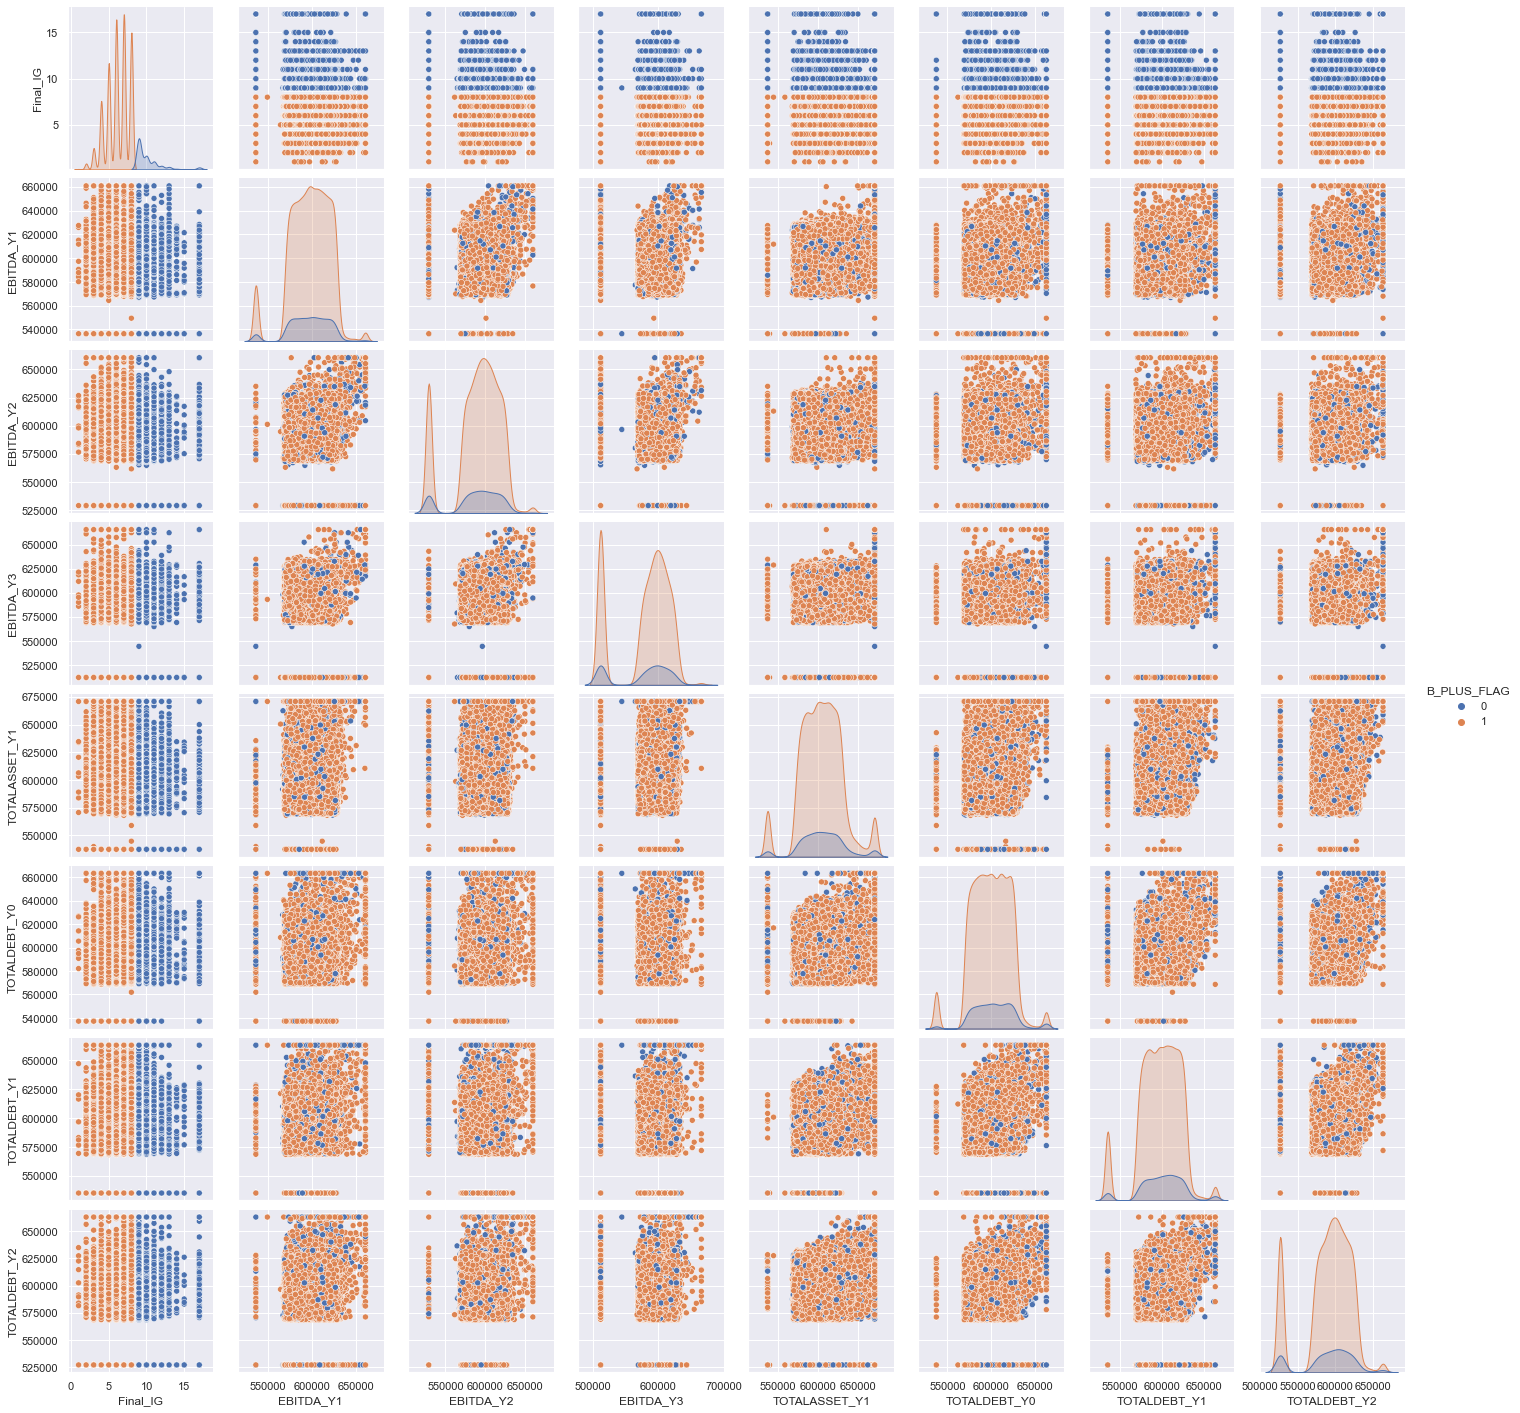

In [94]:
# An easy and convienient way to look at the distribution of each variable, 
# And their relationship with other variables is with pairplot. (We see ALOT of correlation between variables!) 
sns.pairplot(data_1, hue="B_PLUS_FLAG") 

In [95]:
df1.groupby("CUSTOMER_ID").count()

ROW  Corp_Residence_Country_Code  BR Code  Final_IG  B_PLUS_FLAG  \
CUSTOMER_ID                                                                     
0              4                            4        4         4            4   
1              2                            2        2         2            2   
3              4                            4        4         4            4   
4              1                            1        1         1            1   
5              2                            2        2         2            2   
...          ...                          ...      ...       ...          ...   
14027          1                            1        1         1            1   
14028          2                            2        2         2            2   
14029          1                            1        1         1            1   
14030          2                            2        2         2            2   
14031          2                            2        2         2            2   

             EBITDA_Y0  EBITDA_Y1  EBITDA_Y2  EBITDA_Y3  TOTALASSET_Y0  \
CUSTOMER_ID                                                              
0                    4          4          4          4              4   
1                    2          2          2          2              2   
3                    4          4          4          4              4   
4                    1          1          1          1              1   
5                    2          2          2          2              2   
...                ...        ...        ...        ...            ...   
14027                1          1          1          1              1   
14028                2          2          2          2              2   
14029                1          1          1          1              1   
14030                2          2          2          2              2   
14031                2          2          2          2              2   

             TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3  TOTALDEBT_Y0  \
CUSTOMER_ID                                                              
0                        4              4              4             4   
1                        2              2              2             2   
3                        4              4              4             4   
4                        1              1              1             1   
5                        2              2              2             2   
...                    ...            ...            ...           ...   
14027                    1              1              1             1   
14028                    2              2              2             2   
14029                    1              1              1             1   
14030                    2              2              2             2   
14031                    2              2              2             2   

             TOTALDEBT_Y1  TOTALDEBT_Y2  TOTALDEBT_Y3  TOTALREVENUE_Y0  \
CUSTOMER_ID                                                              
0                       4             4             4                4   
1                       2             2             2                2   
3                       4             4             4                4   
4                       1             1             1                1   
5                       2             2             2                2   
...                   ...           ...           ...              ...   
14027                   1             1             1                1   
14028                   2             2             2                2   
14029                   1             1             1                1   
14030                   2             2             2                2   
14031                   2             2             2                2   

             TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  \
CUST

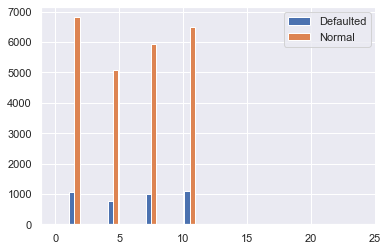

In [96]:
plt.hist( [ df1.loc[ df1['B_PLUS_FLAG']==0, 'Month'], df1.loc[ df1['B_PLUS_FLAG']==1, 'Month'] ],
         label=['Defaulted','Normal'], bins=np.linspace(0,24,25))
plt.legend()
plt.show()

# It seems that in the Q4 and Q1, there seems to be the most number of risky / default cases applied

In [97]:
df1.skew()
# Alot of columns are heavily skewed, with EDITDAR_Y3 being the highest 
# We will need to normalize our columns 

ROW                            0.002683
Corp_Residence_Country_Code    0.755738
BR Code                        2.050356
CUSTOMER_ID                    0.385393
Final_IG                       0.829878
B_PLUS_FLAG                   -2.098370
EBITDA_Y0                     -0.166595
EBITDA_Y1                     -0.573625
EBITDA_Y2                     -0.855660
EBITDA_Y3                     -0.752187
TOTALASSET_Y0                  0.488419
TOTALASSET_Y1                  0.025490
TOTALASSET_Y2                 -0.522509
TOTALASSET_Y3                 -0.601805
TOTALDEBT_Y0                  -0.138252
TOTALDEBT_Y1                  -0.508821
TOTALDEBT_Y2                  -0.778447
TOTALDEBT_Y3                  -1.099373
TOTALREVENUE_Y0                0.248595
TOTALREVENUE_Y1               -0.065177
TOTALREVENUE_Y2               -0.534124
TOTALREVENUE_Y3               -0.633695
CURRENTASSET_Y0                0.013317
CURRENTASSET_Y1               -0.376945
CURRENTASSET_Y2               -0.726167


## Data Distributions by Features & Investment Type <a class="anchor" id="2.2"></a>

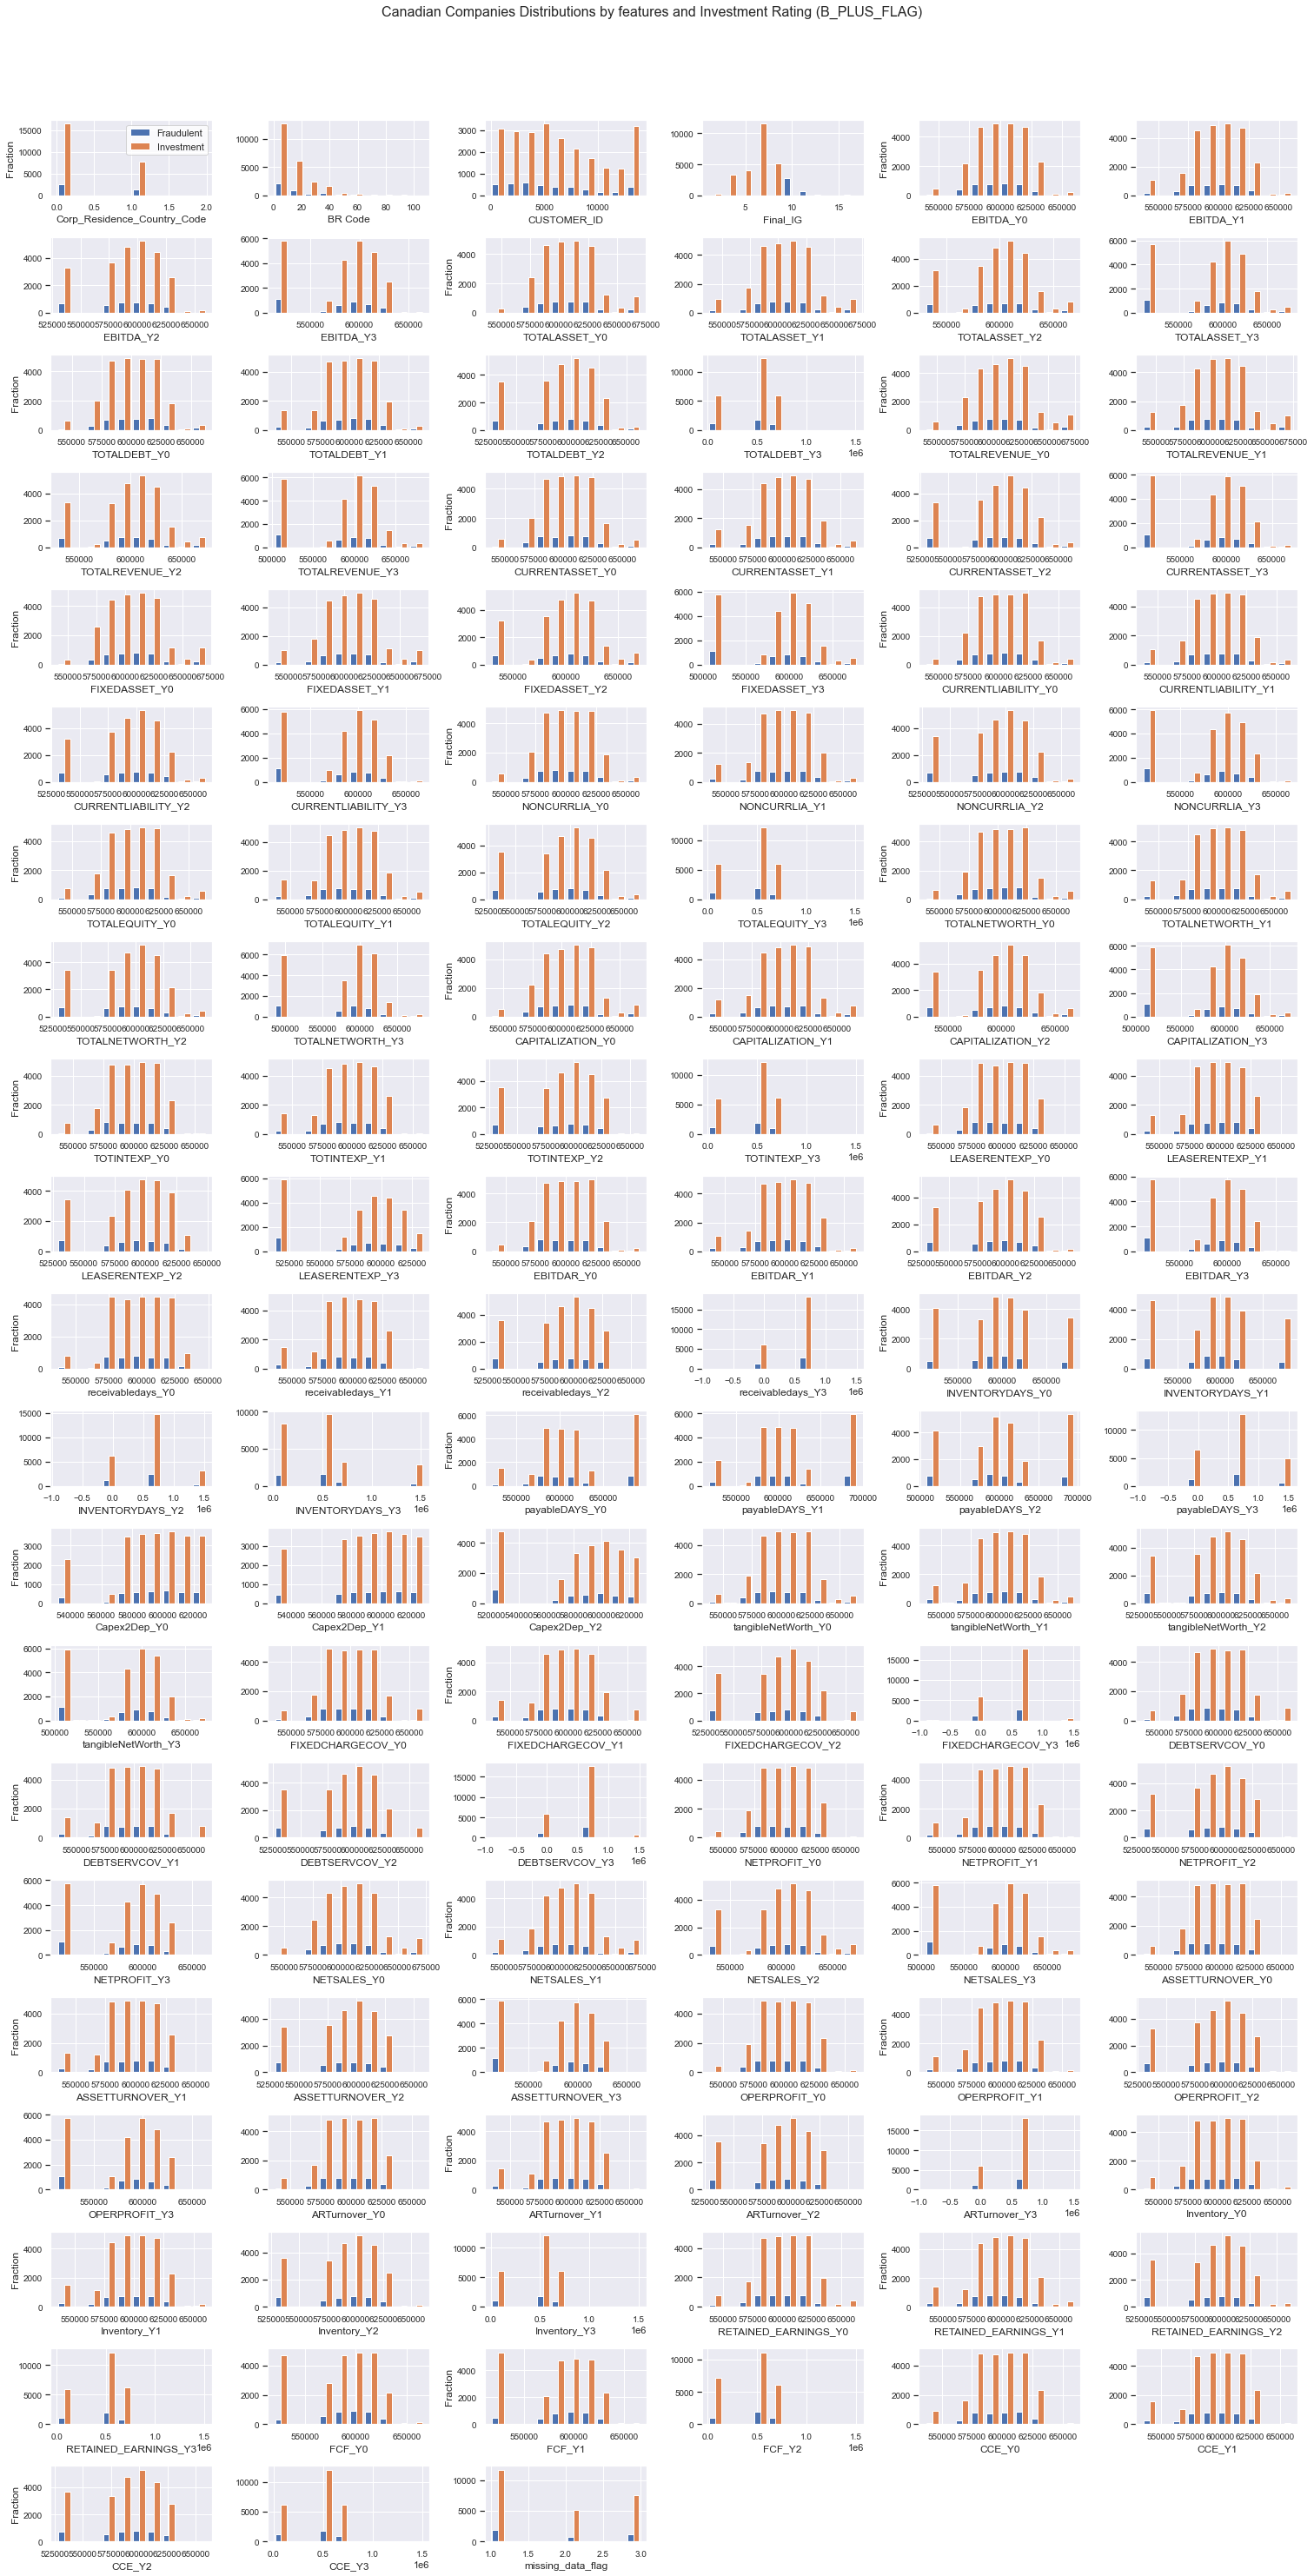

In [98]:
####################################
#### Canadian Companies Dataset ####
####################################

# get the non-financial columns
troublesome_features = ['ROW','Date','Year', 'Month']
fin_features = df1.drop(troublesome_features, axis=1)

label_cols = ['B_PLUS_FLAG']
data_cols = list(fin_features.columns[ fin_features.columns != 'B_PLUS_FLAG' ])
data = df1.copy(deep=True)

# Draw their distributions
# Plot the data by each feature and it's default rating

axarr = [[]]*len(data_cols)
columns = 6
rows = int( np.ceil( len(data_cols) / columns ) )
f, fig = plt.subplots( figsize=(columns*3.5, rows*2) )

f.suptitle('Canadian Companies Distributions by features and Investment Rating (B_PLUS_FLAG)', size=16)


for i, col in enumerate(data_cols[:]):
    axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )
    axarr[i].hist( [ data.loc[ data.B_PLUS_FLAG == 0, col ], data.loc[ data.B_PLUS_FLAG == 1, col ] ], label=['Fraudulent','Investment'], )
    axarr[i].set_xlabel(col, size=12)
    axarr[i].tick_params(axis='both', labelsize=10)
    if i == 0: 
        legend = axarr[i].legend()
        legend.get_frame().set_facecolor('white')
    if i%4 != 0 : 
        axarr[i].tick_params(axis='y', left='off', labelleft='off')
    else:
        axarr[i].set_ylabel('Fraction',size=12)

plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
# plt.savefig('plots/Engineered_Data_Distributions.png')
plt.show()

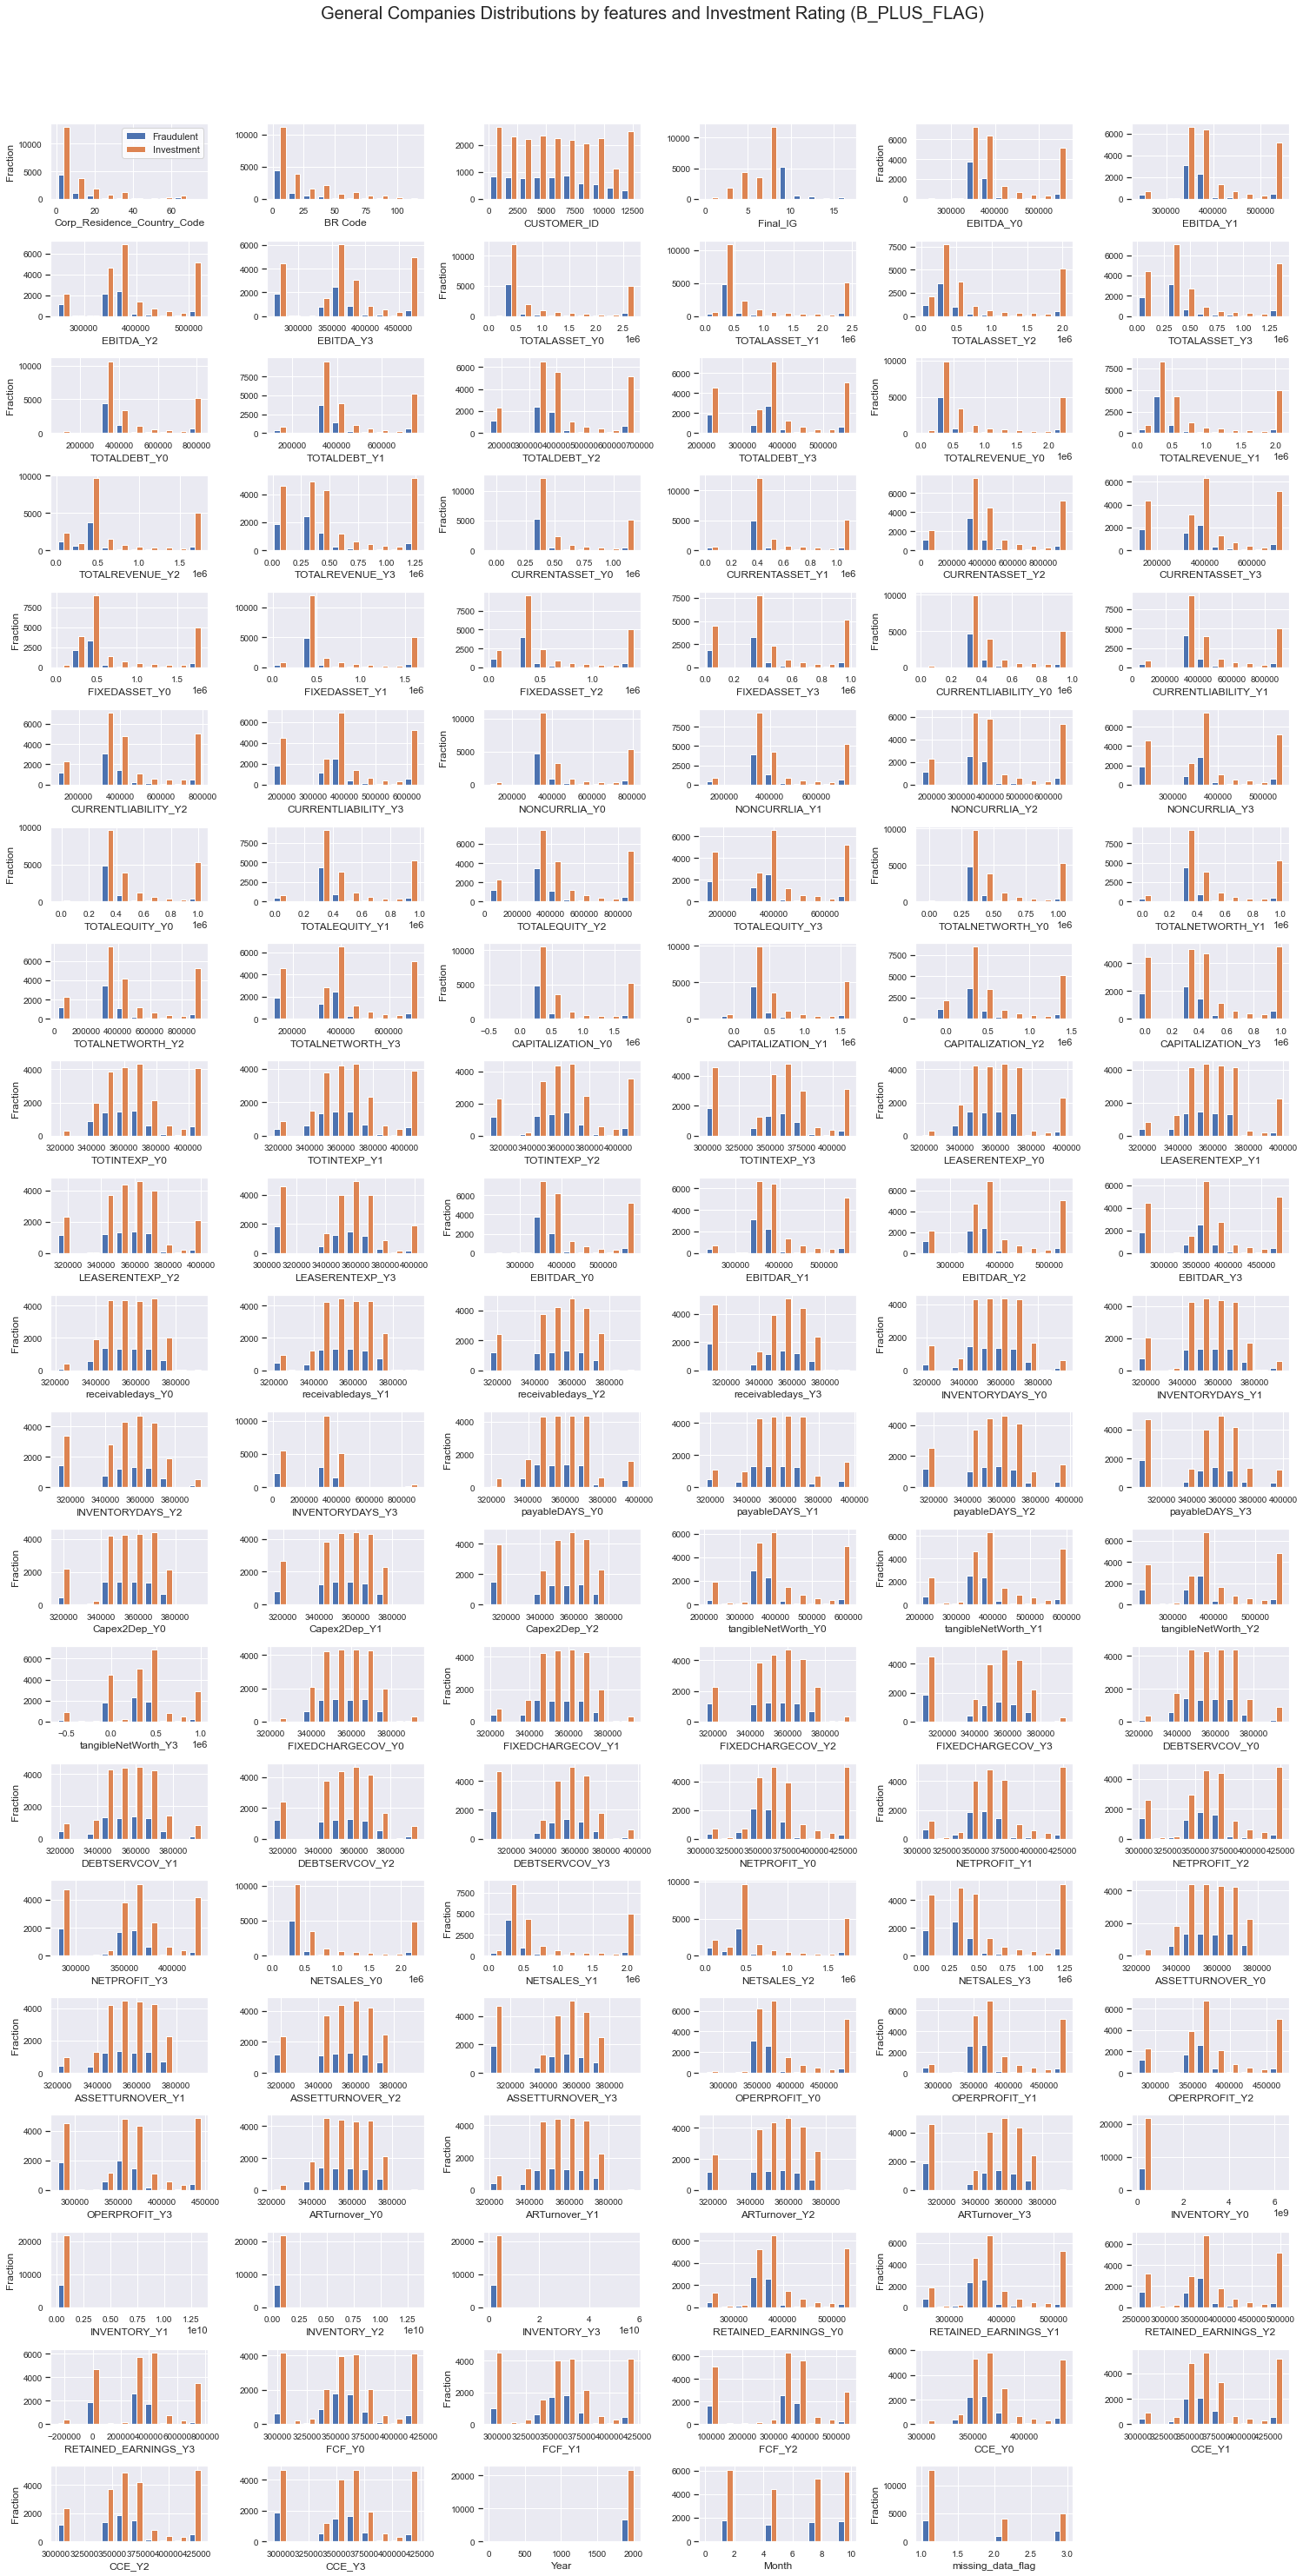

In [99]:
###################################
#### General Companies Dataset ####
###################################

# get the non-financial columns
troublesome_features = ['ROW','Date']
fin_features = df2.drop(troublesome_features, axis=1)

label_cols = ['B_PLUS_FLAG']
data_cols = list(fin_features.columns[ fin_features.columns != 'B_PLUS_FLAG' ])
data = df2.copy(deep=True)

# Draw their distributions
# Plot the data by each feature and it's default rating

axarr = [[]]*len(data_cols)
columns = 6
rows = int( np.ceil( len(data_cols) / columns ) )
f, fig = plt.subplots( figsize=(columns*3.5, rows*2) )

f.suptitle('General Companies Distributions by features and Investment Rating (B_PLUS_FLAG)', size=20)

for i, col in enumerate(data_cols[:]):
    axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )
    axarr[i].hist( [ data.loc[ data.B_PLUS_FLAG == 0, col ], data.loc[ data.B_PLUS_FLAG == 1, col ] ], label=['Fraudulent','Investment'], )
    axarr[i].set_xlabel(col, size=12)
    axarr[i].tick_params(axis='both', labelsize=10)
    if i == 0: 
        legend = axarr[i].legend()
        legend.get_frame().set_facecolor('white')
    if i%4 != 0 : 
        axarr[i].tick_params(axis='y', left='off', labelleft='off')
    else:
        axarr[i].set_ylabel('Fraction',size=12)

plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
# plt.savefig('plots/Engineered_Data_Distributions.png')
plt.show()

In [100]:
df1.head()

ROW  Corp_Residence_Country_Code  BR Code  CUSTOMER_ID  Final_IG  \
0   5662                            1        5         1576         5   
1  16369                            1        5         4545         7   
2   2326                            0       12          648         8   
3  38131                            0       19        13395         5   
4  36605                            0       19        12998         6   

   B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
0            1  575863.911214  602838.635998  583646.469630  614602.866245   
1            1  599469.364624  615373.028208  612705.047096  512031.899430   
2            1  613829.072017  575020.270272  583630.783425  595256.346525   
3            1  585059.299344  581915.869330  594033.887481  609965.034011   
4            1  605966.227164  593540.797737  575448.556931  512031.899430   

   TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3   TOTALDEBT_Y0  \
0  619611.510181  621095.725446  611355.907673  582433.004400  623105.791017   
1  608126.531748  601435.154115  587550.520995  508218.086643  627335.355343   
2  608391.483917  611859.108037  607825.470188  592953.319963  585464.960100   
3  591791.219692  598332.776102  589877.849288  622230.836194  584513.060799   
4  582546.955793  614212.207680  578068.515601  508218.086643  590177.329836   

    TOTALDEBT_Y1   TOTALDEBT_Y2   TOTALDEBT_Y3  TOTALREVENUE_Y0  \
0  596800.177680  600460.033208  598408.339905    611355.411490   
1  611300.879046  572542.268654       0.000000    604626.757034   
2  571781.269380  585642.496712  593575.189122    608591.366569   
3  626767.691011  625743.779183  573802.856646    615999.168162   
4  570997.852457  625971.749956       0.000000    607879.645878   

   TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  CURRENTASSET_Y0  \
0    589592.109008    605336.777910    574789.603998    620745.952718   
1    586282.226249    624691.726730    501716.330148    596315.871786   
2    578175.200440    602523.843620    605501.836474    618999.144319   
3    588623.823558    600443.812695    633589.116171    582358.584899   
4    628042.392612    592671.553802    501716.330148    624481.204725   

   CURRENTASSET_Y1  CURRENTASSET_Y2  CURRENTASSET_Y3  FIXEDASSET_Y0  \
0    621004.600446    614991.732391    604478.517167  609095.636450   
1    609786.889797    620321.870767    507962.639632  577715.935070   
2    614118.293569    592205.828625    593381.268052  578343.317529   
3    612497.219818    606794.985460    589340.181176  621919.270235   
4    620443.236288    584608.020724    507962.639632  581316.994347   

   FIXEDASSET_Y1  FIXEDASSET_Y2  FIXEDASSET_Y3  CURRENTLIABILITY_Y0  \
0  600147.701765  589971.619360  580405.105567        578103.988392   
1  576662.704616  582062.515093  505654.999259        616376.771099   
2  575530.917780  590556.467199  595629.061840        603655.551037   
3  607400.754064  581688.692973  633939.157288        620046.519867   
4  618157.473873  612201.478244  505654.999259        594651.641147   

   CURRENTLIABILITY_Y1  CURRENTLIABILITY_Y2  CURRENTLIABILITY_Y3  \
0        577109.531117        574090.626783        583030.371565   
1        604827.131130        599463.087501        511127.253255   
2        574183.093293        597137.973102        596570.797275   
3        607197.874782        589234.421690        615945.241601   
4        588273.242403        628893.487075        511127.253255   

   NONCURRLIA_Y0  NONCURRLIA_Y1  NONCURRLIA_Y2  NONCURRLIA_Y3  TOTALEQUITY_Y0  \
0  600890.935743  604975.472270  600103.052065  601804.995337   596259.219747   
1  584268.408156  615338.209036  617623.837767  509722.989076   599915.942888   
2  605298.293603  598985.457637  602326.489701  610354.711853   577735.145730   
3  624582.882164  571604.744174  618284.670890  582971.670808   601679.290137   
4  619814.409081  612323.296890  579970.364292  509722.989076   604318.176057   

   TOTALEQUITY_Y1  TOTAL

In [101]:
df2.head()

ROW  Corp_Residence_Country_Code  BR Code  CUSTOMER_ID  Final_IG  \
0  28464                            2        4         8228         8   
1  39693                            3       63        12315         7   
2  19535                           15       13         5504         6   
3   4286                            2        4         1107         8   
4  39621                           59       30        12294         8   

   B_PLUS_FLAG      EBITDA_Y0      EBITDA_Y1      EBITDA_Y2      EBITDA_Y3  \
0            1  365604.767017  341575.264490  368053.254720  370696.187829   
1            1  564307.130704  549358.882217  526399.759733  479913.916296   
2            1  379351.685119  394182.092405  380051.883962  383669.693000   
3            1  363552.396086  371786.373645  371542.067484  365204.228853   
4            1  368530.936855  367450.033454  358297.870364  261315.206457   

   TOTALASSET_Y0  TOTALASSET_Y1  TOTALASSET_Y2  TOTALASSET_Y3   TOTALDEBT_Y0  \
0   3.706175e+05   3.497885e+05   3.485696e+05   3.757753e+05  375510.954405   
1   2.715529e+06   2.232579e+06   2.065349e+06   1.379724e+06  828728.508363   
2   6.441022e+05   6.050513e+05   6.206603e+05   6.305246e+05  425385.779348   
3   3.846639e+05   3.789517e+05   3.551879e+05   3.713978e+05  372174.532867   
4   3.516819e+05   3.563508e+05   3.427291e+05   0.000000e+00  369333.246102   

    TOTALDEBT_Y1   TOTALDEBT_Y2   TOTALDEBT_Y3  TOTALREVENUE_Y0  \
0  372600.077528  360644.686054  373539.595801     3.560748e+05   
1  767224.564410  682225.237404  569093.175789     1.522408e+06   
2  390735.673995  477455.869440  452824.941068     7.995319e+05   
3  371370.256259  377959.226908  344581.947799     3.636668e+05   
4  362348.577120  339978.978376  208433.054414     3.529416e+05   

   TOTALREVENUE_Y1  TOTALREVENUE_Y2  TOTALREVENUE_Y3  CURRENTASSET_Y0  \
0     3.633396e+05     3.585169e+05     3.715991e+05     3.434351e+05   
1     1.327851e+06     1.280758e+06     1.135047e+06     1.147513e+06   
2     7.199362e+05     7.406381e+05     7.131936e+05     5.311816e+05   
3     3.575831e+05     3.662552e+05     3.804336e+05     3.623015e+05   
4     3.407400e+05     3.740230e+05     0.000000e+00     3.715968e+05   

   CURRENTASSET_Y1  CURRENTASSET_Y2  CURRENTASSET_Y3  FIXEDASSET_Y0  \
0    344977.126649    367162.335140    349945.750055   3.784293e+05   
1    829702.295435    760807.341039    731317.485075   1.815612e+06   
2    514741.746178    528849.435520    584501.847521   4.444025e+05   
3    377101.596125    374928.690083    345777.748609   3.555814e+05   
4    371805.672012    346038.553821    116244.079239   3.720567e+05   

   FIXEDASSET_Y1  FIXEDASSET_Y2  FIXEDASSET_Y3  CURRENTLIABILITY_Y0  \
0   3.720962e+05   3.688327e+05   3.472348e+05        355541.904130   
1   1.640463e+06   1.408298e+06   1.000416e+06        644352.547945   
2   4.533300e+05   4.490554e+05   4.587347e+05        481135.648099   
3   3.733798e+05   3.593706e+05   3.437278e+05        348458.696351   
4   3.721733e+05   3.614443e+05   0.000000e+00        360704.301769   

   CURRENTLIABILITY_Y1  CURRENTLIABILITY_Y2  CURRENTLIABILITY_Y3  \
0        367439.639625        340433.991591        367150.907129   
1        487669.347380        497662.519665        481394.063071   
2        467669.404784        504347.660158        534499.419393   
3        361418.841014        356877.324987        363708.386391   
4        349895.912646        356684.002329        170361.129604   

   NONCURRLIA_Y0  NONCURRLIA_Y1  NONCURRLIA_Y2  NONCURRLIA_Y3  TOTALEQUITY_Y0  \
0  353405.890207  355716.993127  353085.838690  340960.105507    3.533652e+05   
1  811152.094028  751837.688769  662928.358119  545396.581271    1.030510e+06   
2  408389.856374  411947.733484  418667.721283  425802.859000    4.526367e+05   
3  347006.321559  355503.249815  362869.046087  346293.036669    3.701590e+05   
4  371742.147792  344301.439001  341897.951742  220967.759762    3.435124e+05   

   TOTALEQUITY_Y1  TOTAL